<a href="https://colab.research.google.com/github/pr1838341/assign/blob/main/decision_tree_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: i want to upload a data file through collab, give me the required code

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Company_Data.csv to Company_Data.csv
User uploaded file "Company_Data.csv" with length 17023 bytes


In [6]:
import pandas as pd
df=pd.read_csv("Company_Data.csv")
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

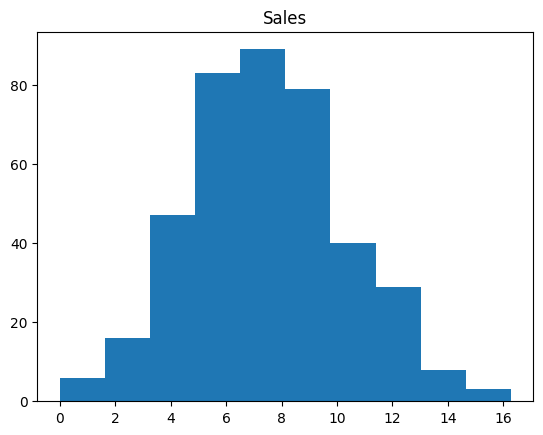

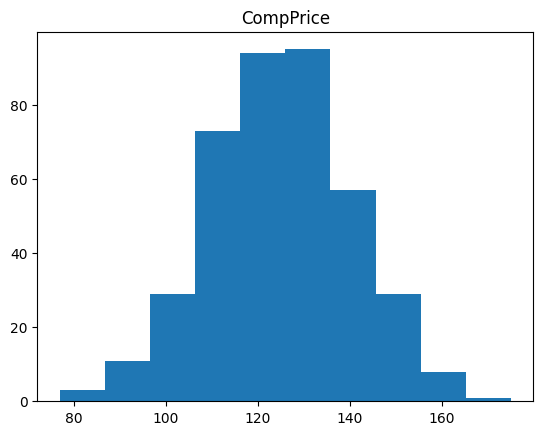

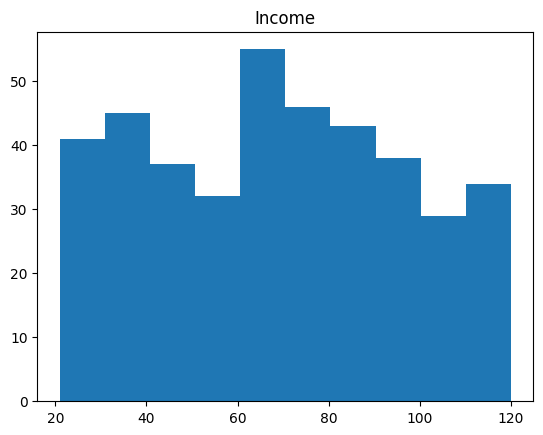

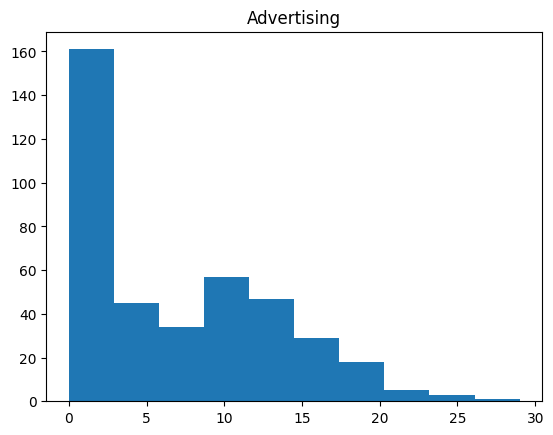

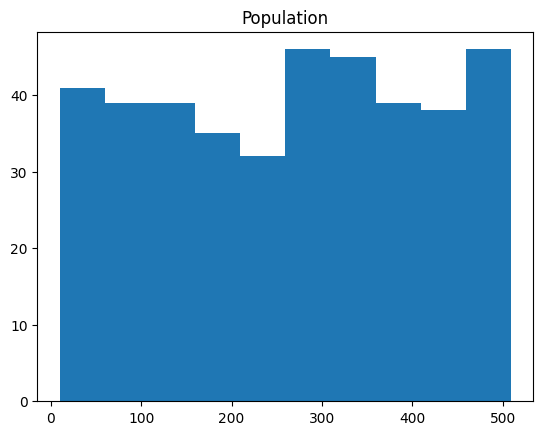

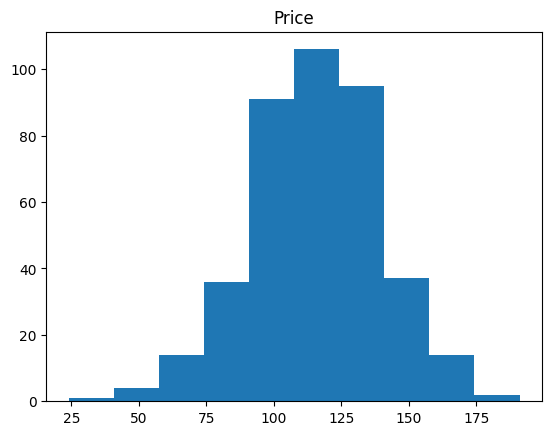

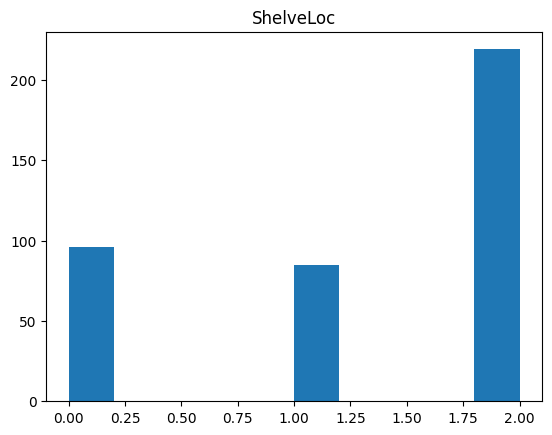

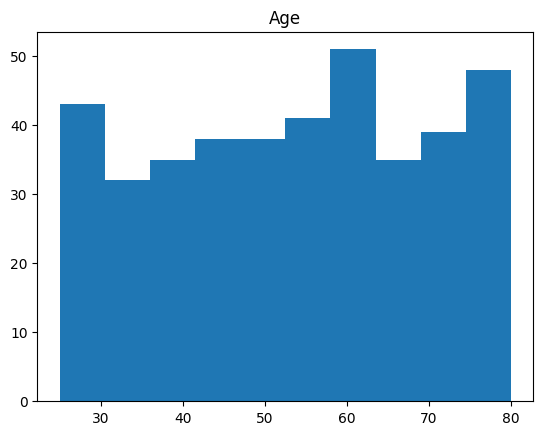

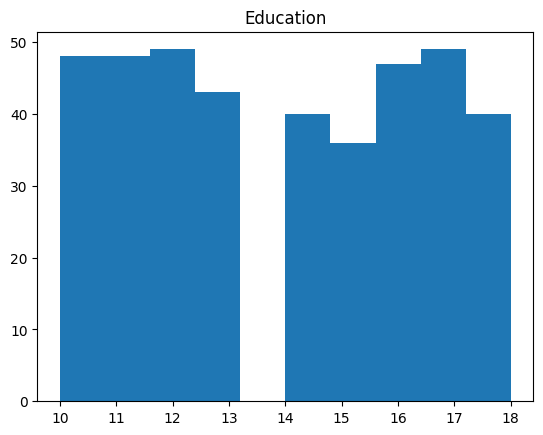

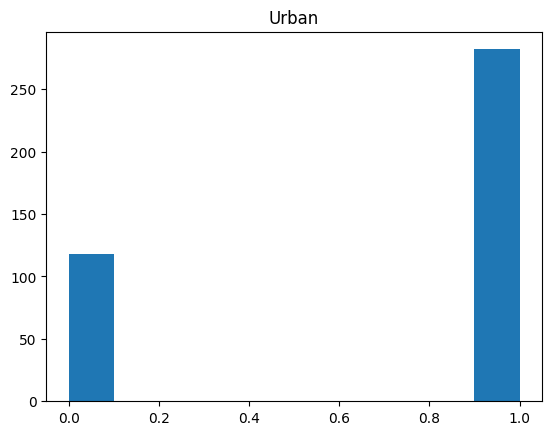

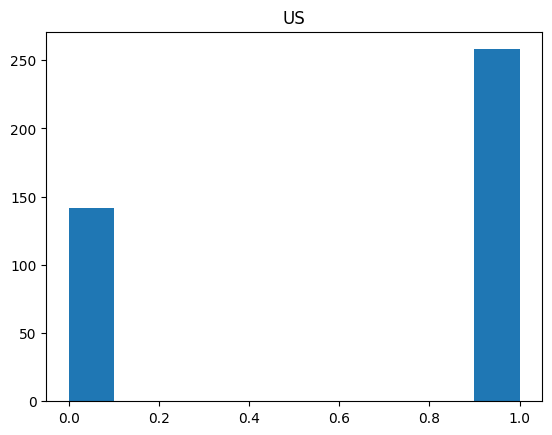

In [29]:
# prompt: all coumun wise give plots

for col in df:
  plt.hist(df[col])
  plt.title(col)
  plt.show()


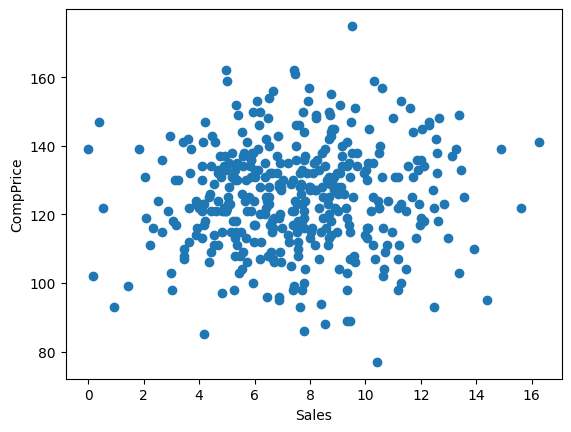

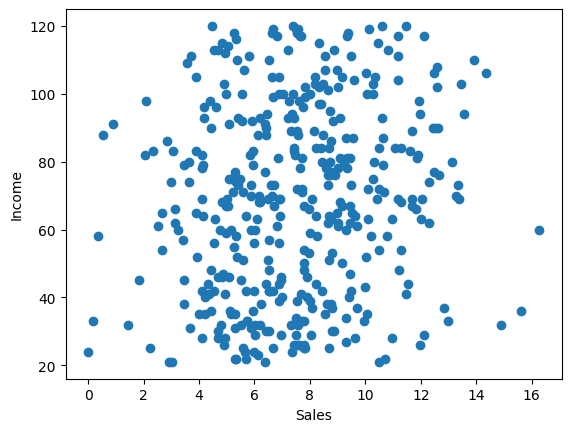

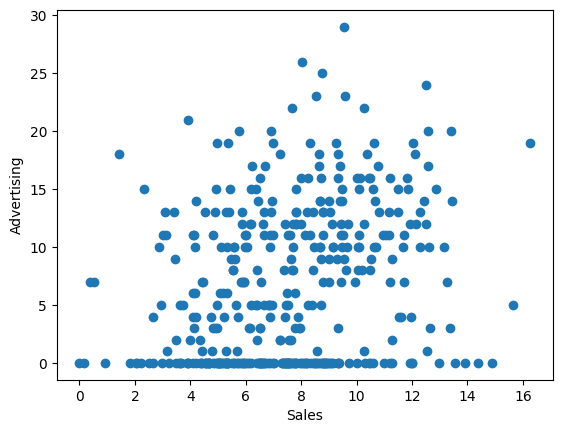

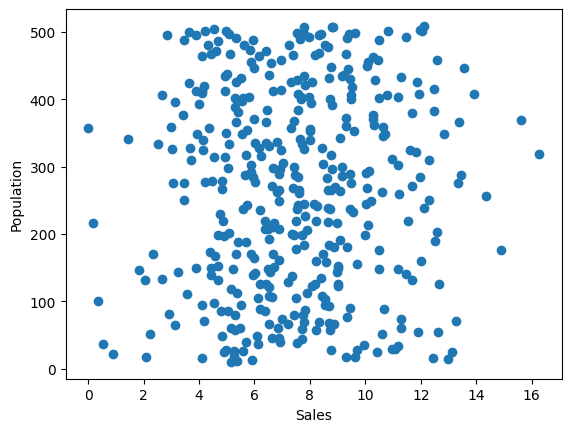

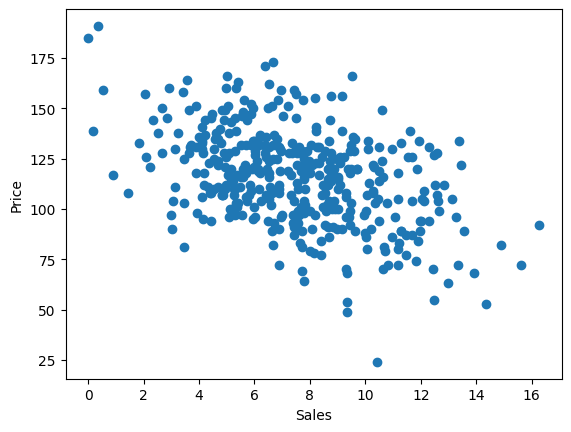

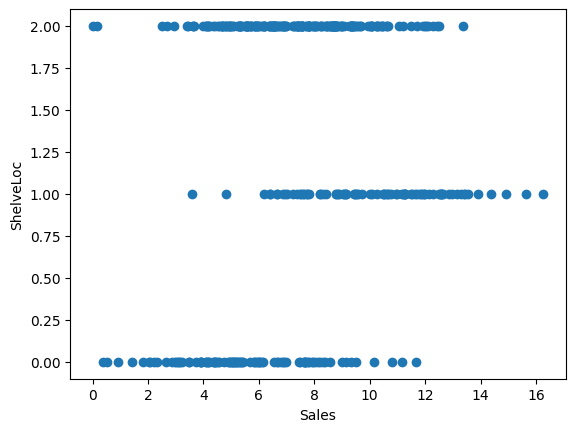

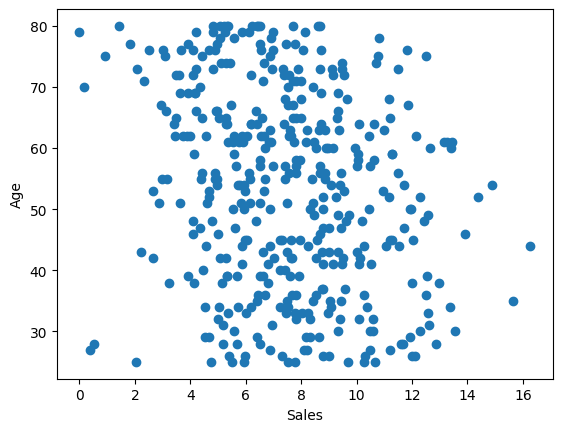

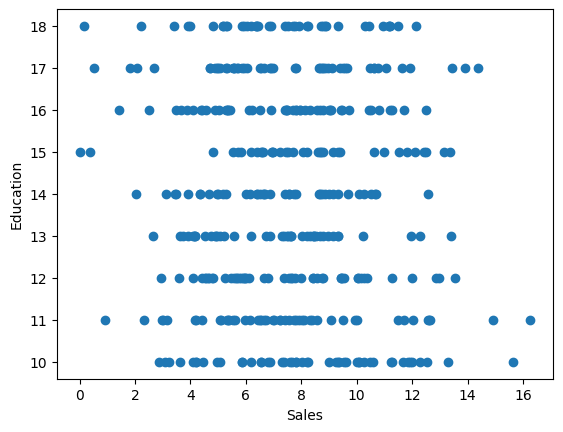

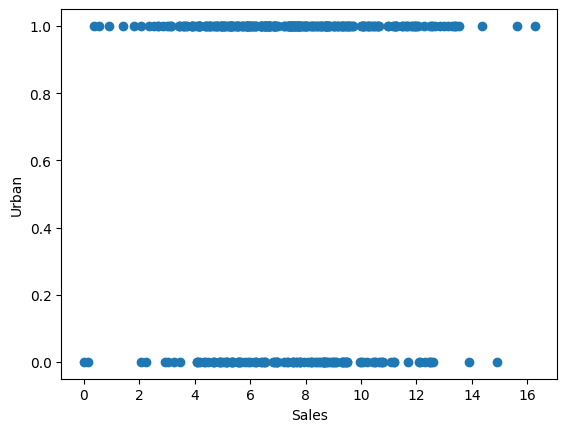

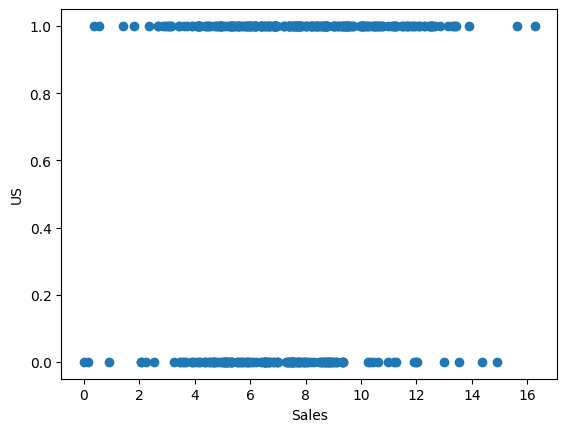

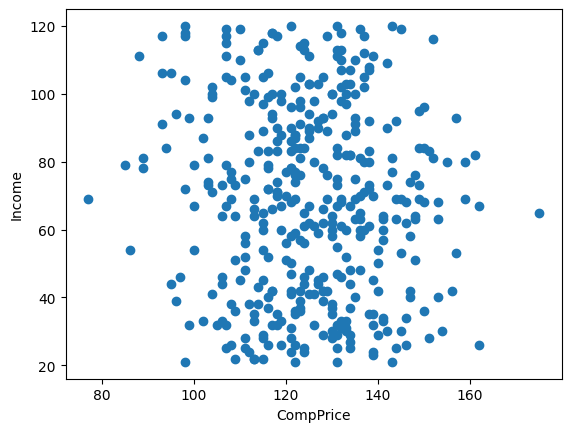

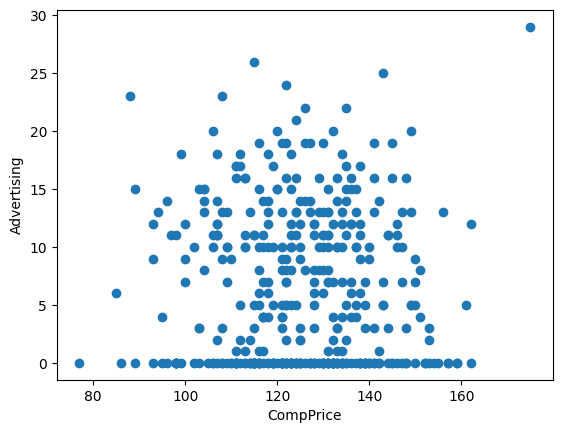

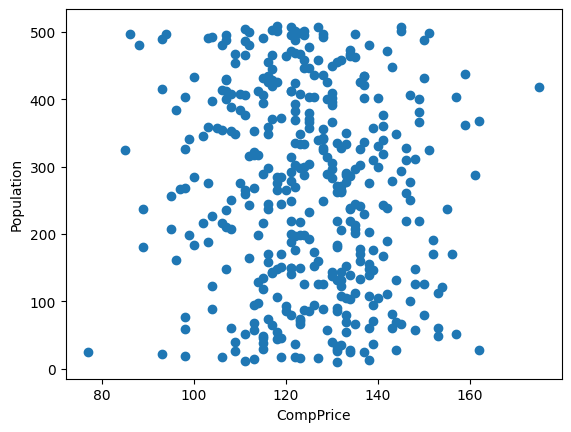

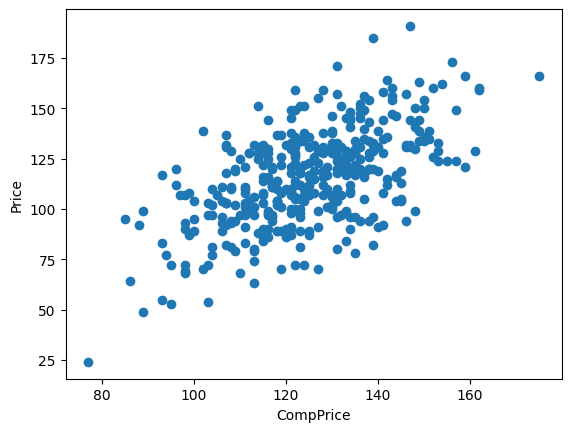

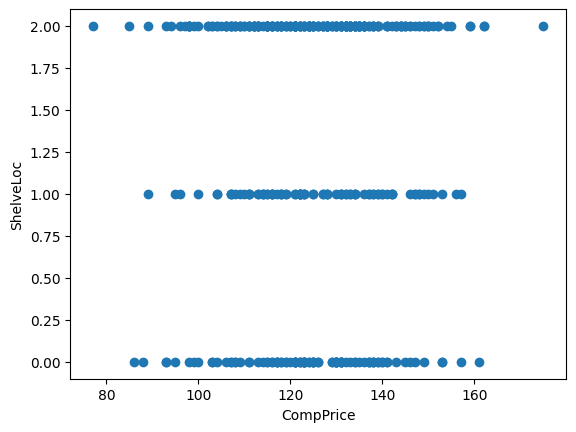

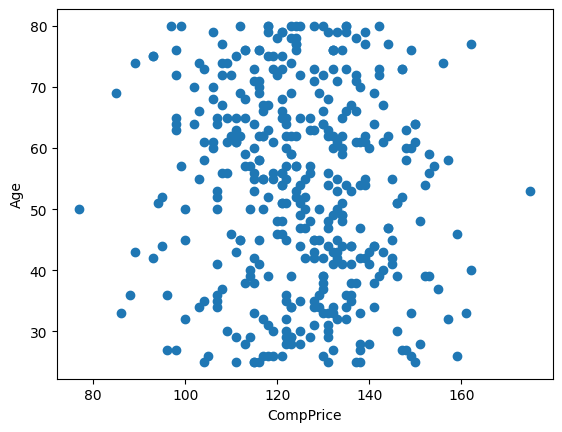

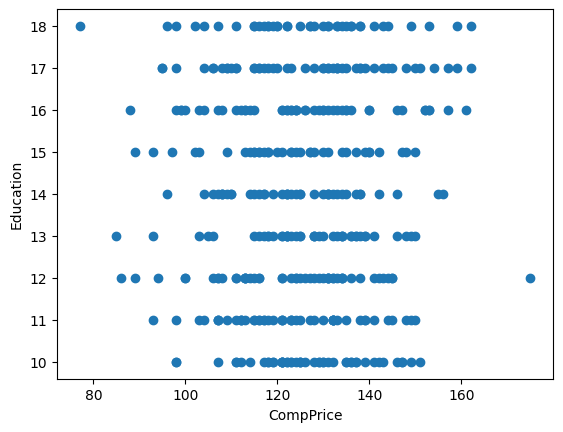

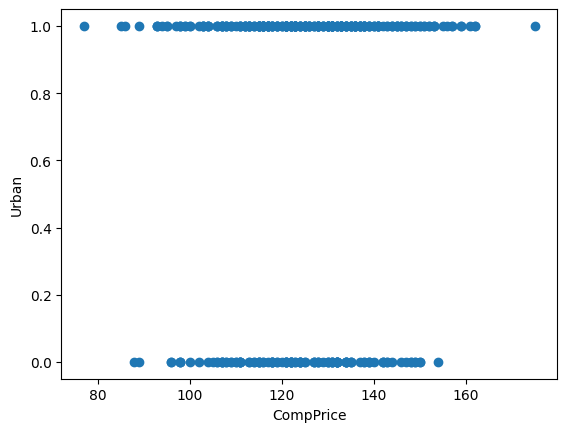

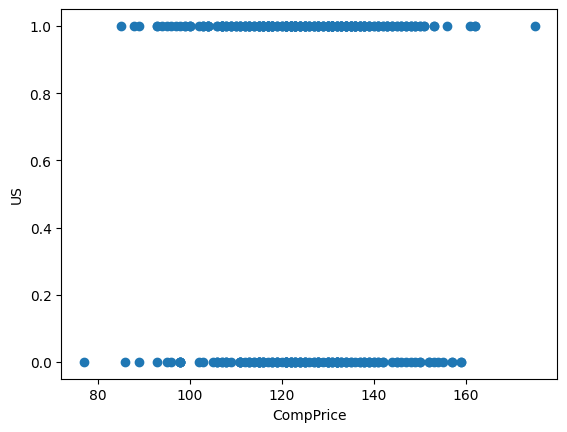

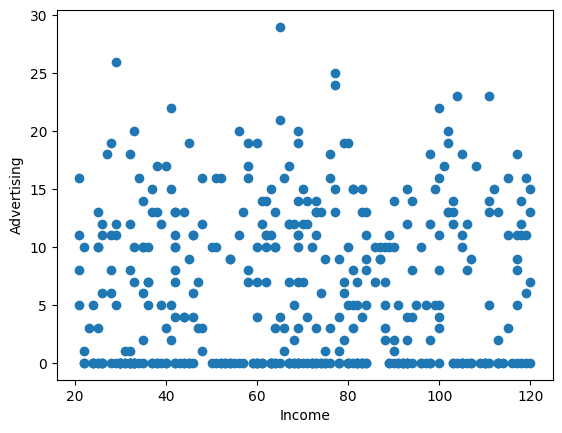

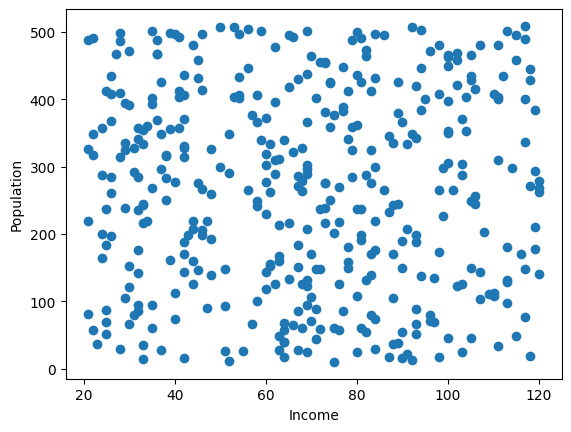

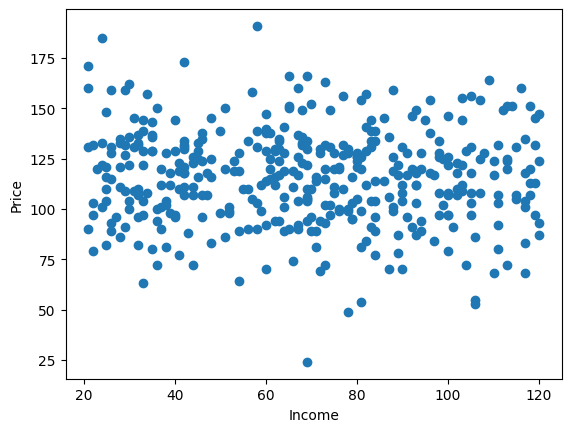

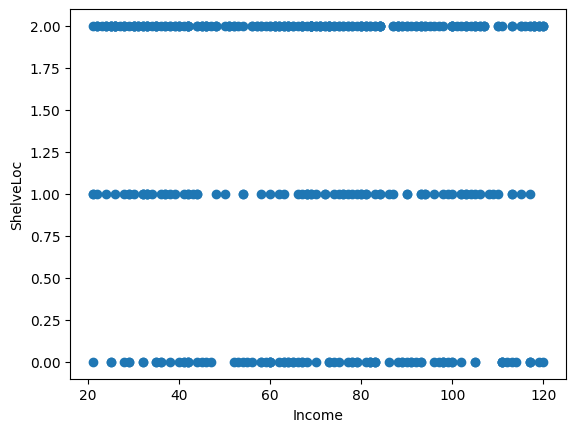

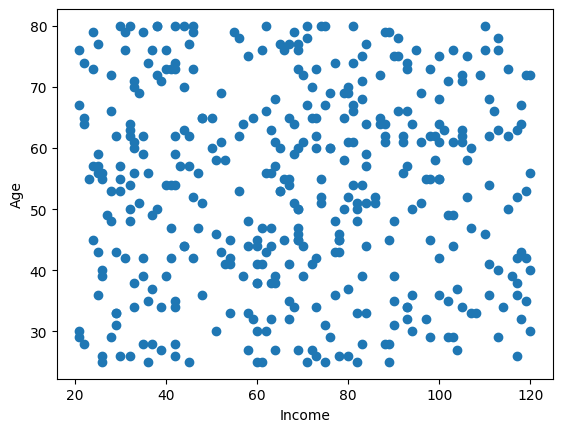

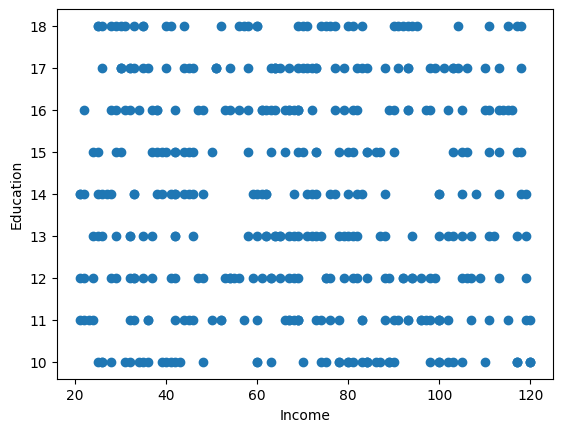

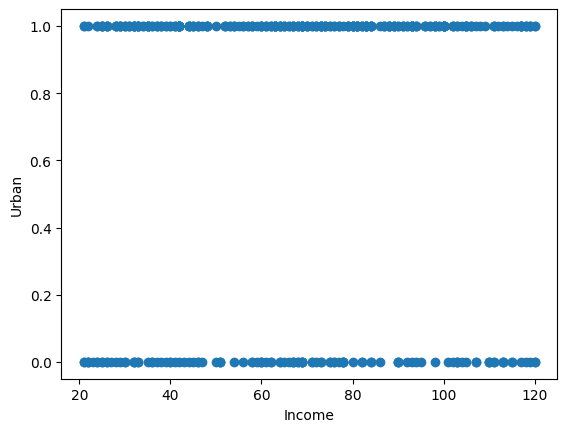

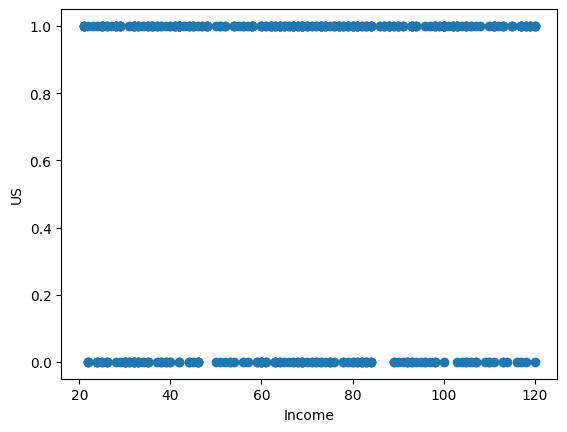

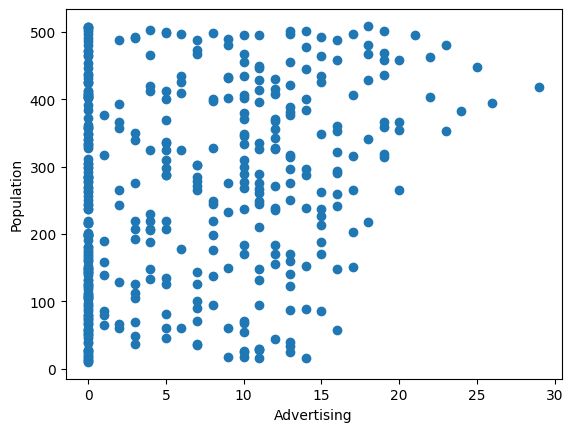

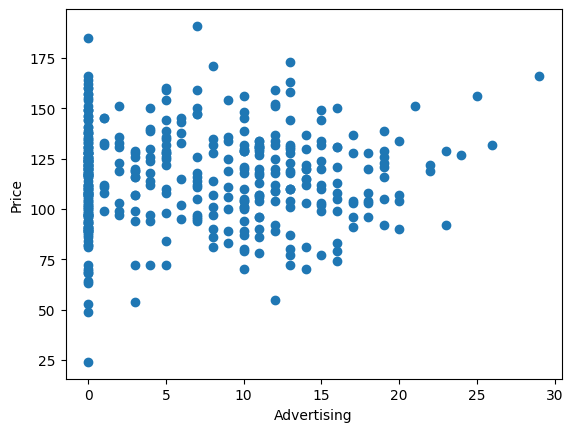

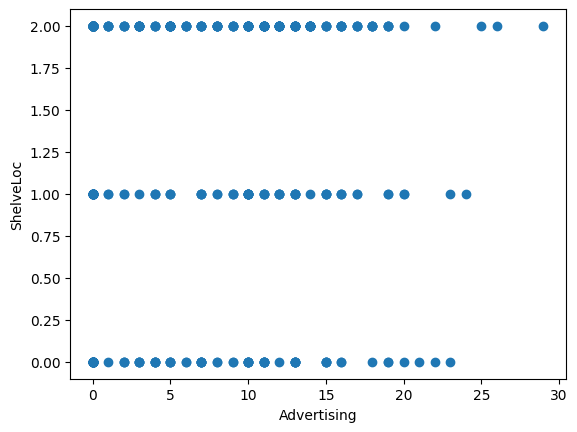

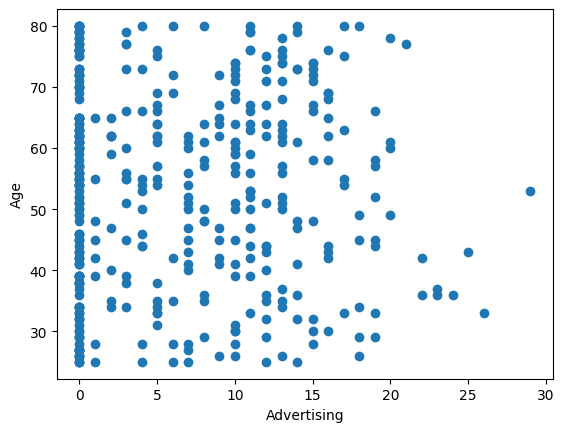

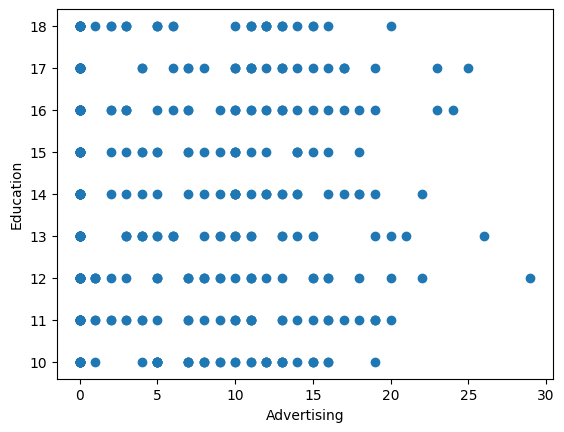

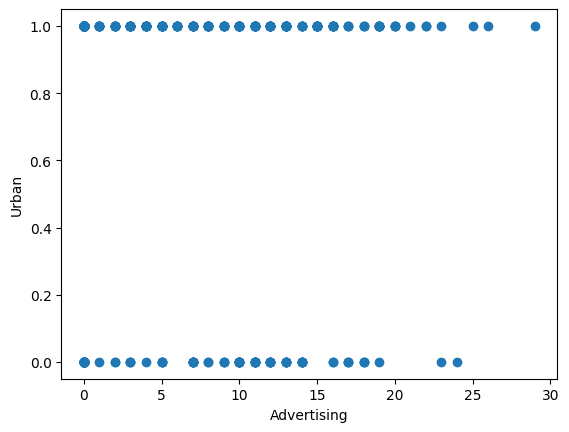

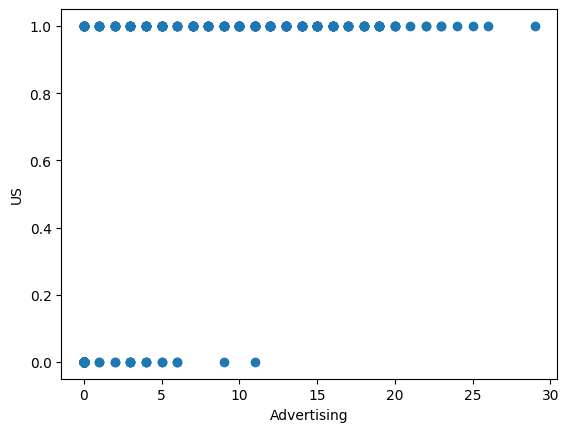

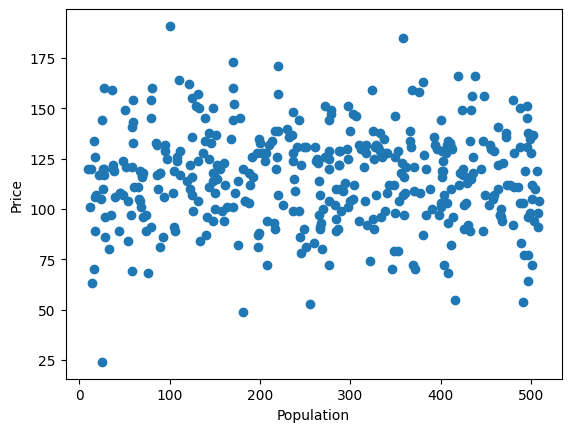

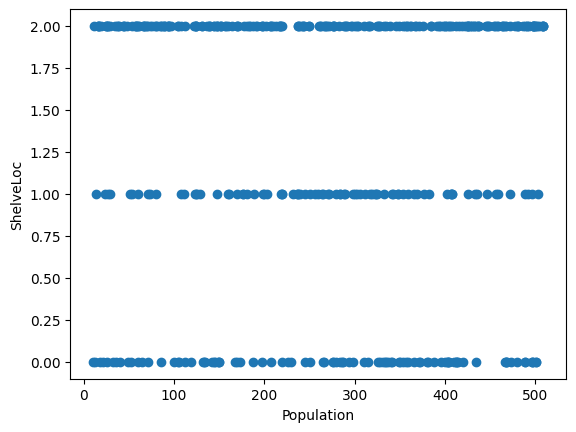

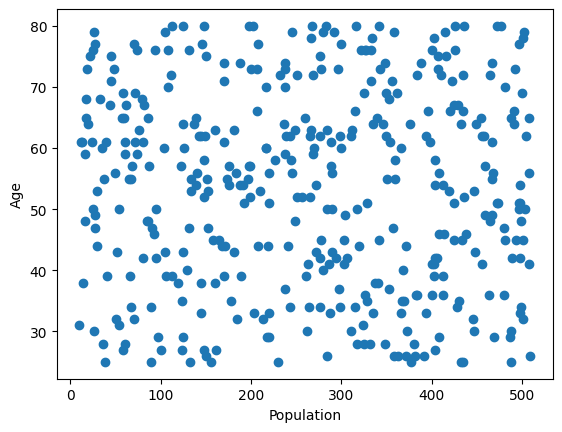

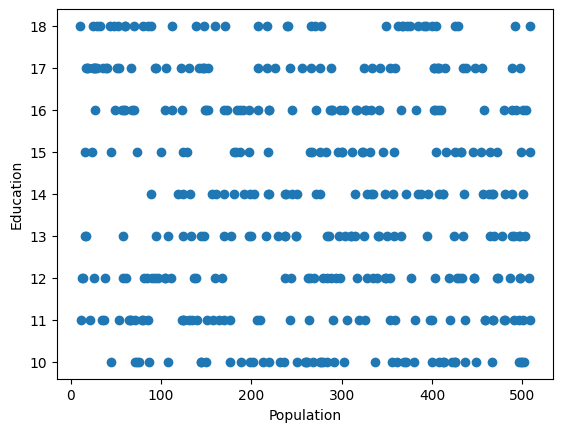

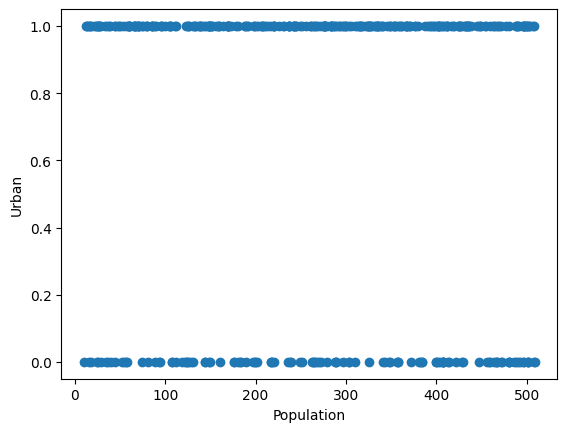

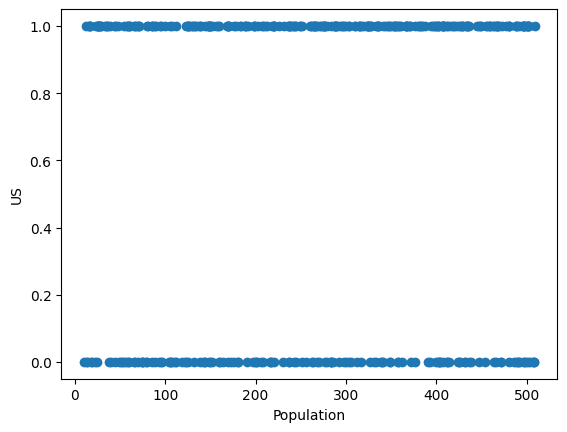

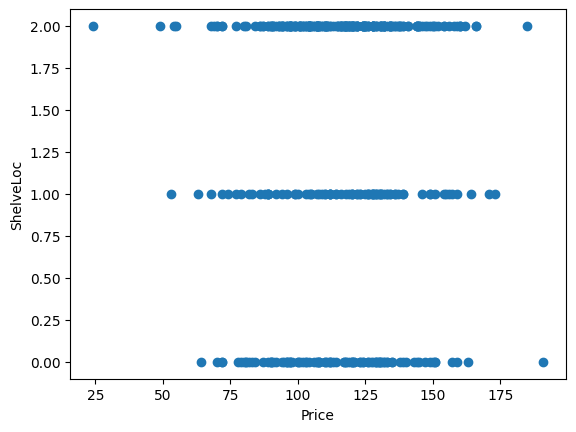

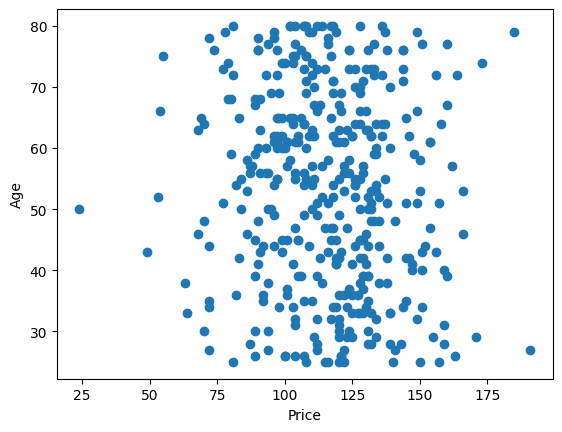

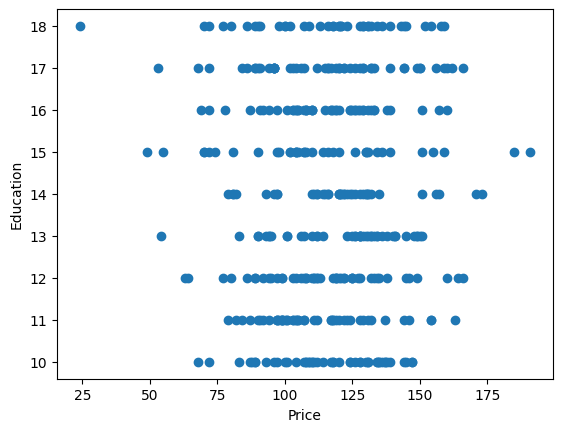

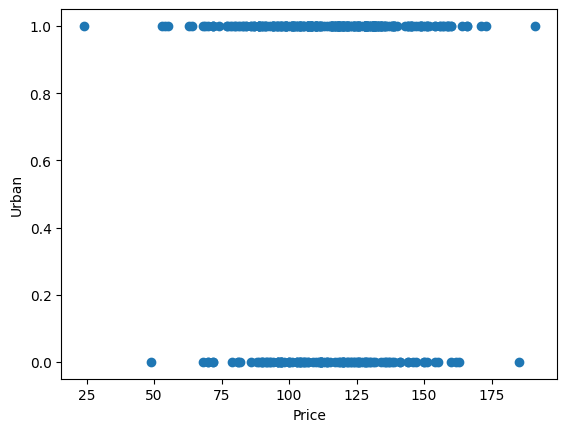

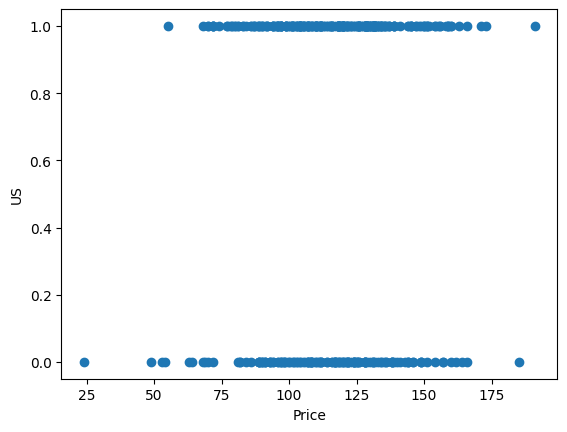

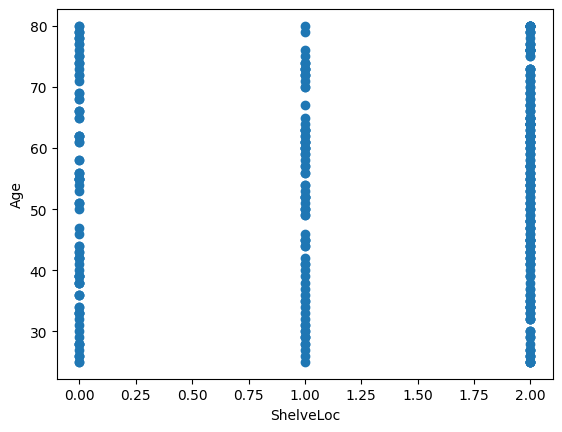

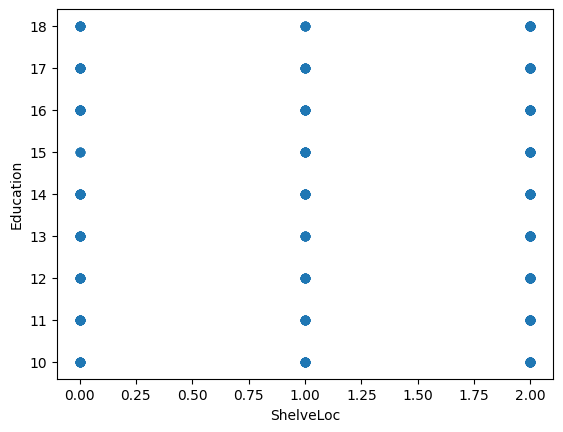

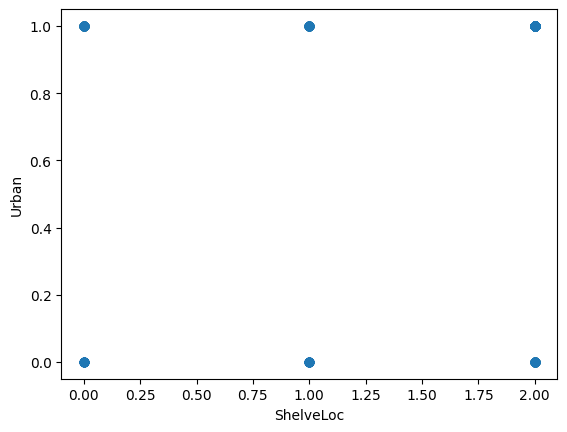

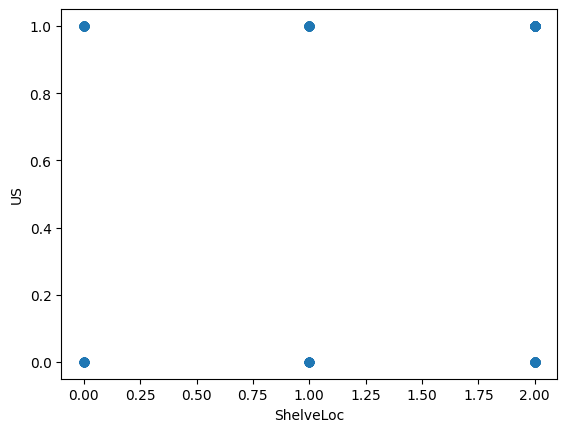

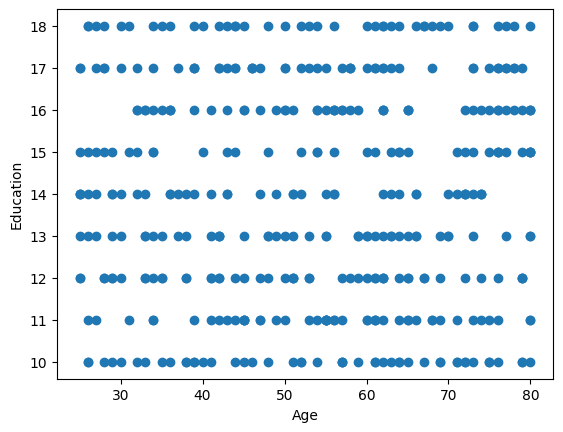

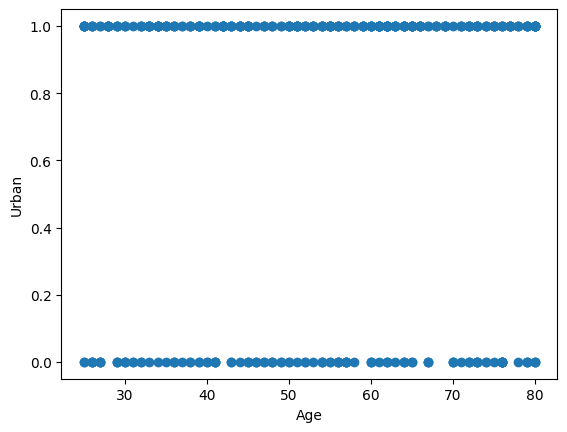

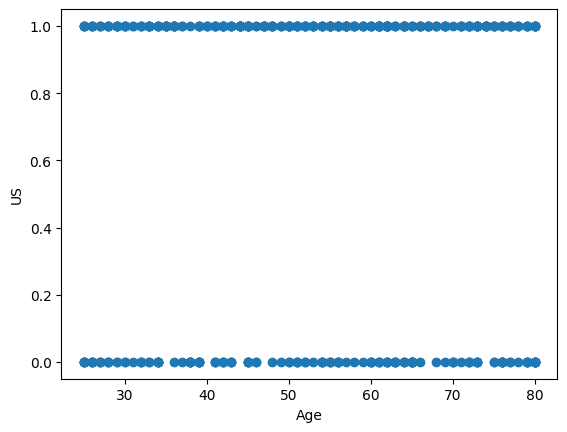

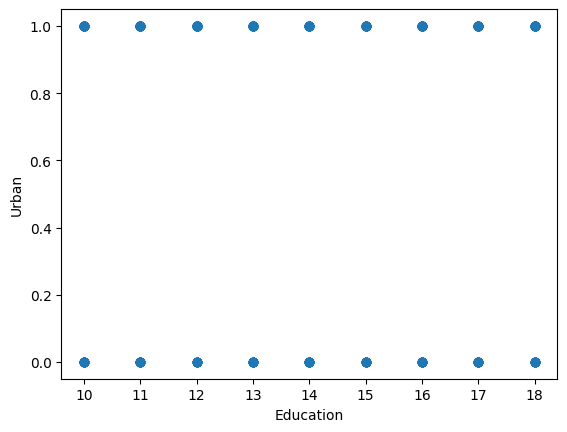

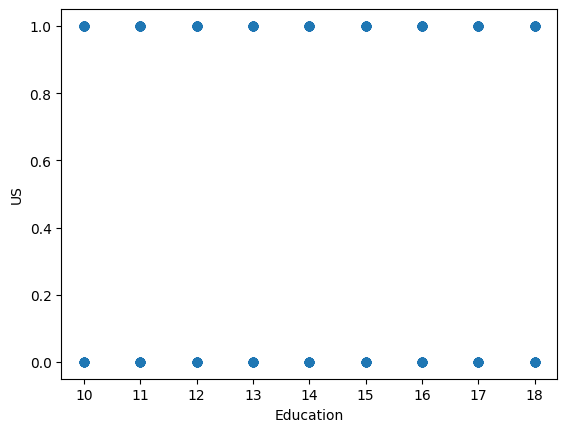

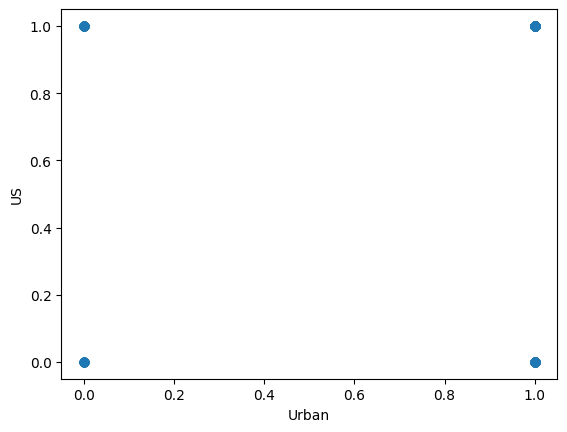

In [30]:
# prompt: all colun wise give scatter plot

for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        plt.scatter(df[df.columns[i]], df[df.columns[j]])
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.select_dtypes(include='object'):
  df[col] = le.fit_transform(df[col])

In [8]:
X=df.drop(["Sales"],axis=1)
Y=df["Sales"]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)


In [10]:
# cross validation method
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()


training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Cross validation Training error: ", np.mean(training_error).round(2))
print("Cross validation Test error: ", np.mean(test_error).round(2))


Cross validation Training error:  0.0
Cross validation Test error:  2.29


In [11]:
# Bagging Regressor
from sklearn.ensemble import BaggingRegressor
dt_model = BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=100,max_features=0.7,max_samples=0.6)

training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Bagging-Cross validation Training error: ", np.mean(training_error).round(2))
print("Bagging-Cross validation Test error: ", np.mean(test_error).round(2))


Bagging-Cross validation Training error:  1.0
Bagging-Cross validation Test error:  1.78


In [12]:
# RandomForests Regressor
from sklearn.ensemble import RandomForestRegressor
dt_model = RandomForestRegressor(n_estimators=100,max_features=0.7,max_samples=0.6)

training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("RandomForests-Cross validation Training error: ", np.mean(training_error).round(2))
print("RandomForests-Cross validation Test error: ", np.mean(test_error).round(2))


RandomForests-Cross validation Training error:  0.93
RandomForests-Cross validation Test error:  1.65


In [3]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
!pip install graphviz

In [16]:
import graphviz

In [ ]:
# GradineBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
dt_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)

training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Gradient Boosting-Cross validation Training error: ", np.mean(training_error).round(2))
print("Gradient Boosting-Cross validation Test error: ", np.mean(test_error).round(2))


Gradient Boosting-Cross validation Training error:  0.56
Gradient Boosting-Cross validation Test error:  1.39


In [21]:
# prompt: import xgb above code an d fit the model and check the croos valadation

import xgboost as xgb

dt_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)

training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("XGBoost-Cross validation Training error: ", np.mean(training_error).round(2))
print("XGBoost-Cross validation Test error: ", np.mean(test_error).round(2))



XGBoost-Cross validation Training error:  0.1
XGBoost-Cross validation Test error:  1.57


In [ ]:
# prompt: can you give us code using gridsearchcv method

from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [0.7, 0.8, 0.9],
    'learning_rate': [0.01,0.1,0.5,1]}

# Create a BaggingClassifier instance
GB_reg = GradientBoostingRegressor()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(GB_reg, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict the labels for the test data using the best model
Y_pred_train = best_model.predict(X_train)
Y_pred_test = best_model.predict(X_test)

# Calculate the accuracy of the best model
test_error = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
train_error = np.sqrt(mean_squared_error(Y_train, Y_pred_train))

# Print the accuracy of the best model
print("Train error (best model):", train_error)
print("Test error (best model):", test_error)


Best parameters: {'learning_rate': 0.1, 'max_features': 0.7, 'n_estimators': 100}
Train error (best model): 0.646504301546413
Test error (best model): 1.2824140837162774


In [ ]:
# prompt: file uplod

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Fraud_check.csv to Fraud_check.csv
User uploaded file "Fraud_check.csv" with length 21837 bytes


In [ ]:
import pandas as pd
df=pd.read_csv("Fraud_check.csv")
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

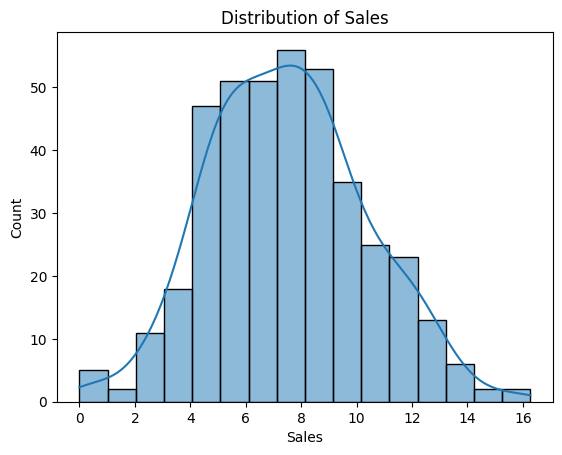

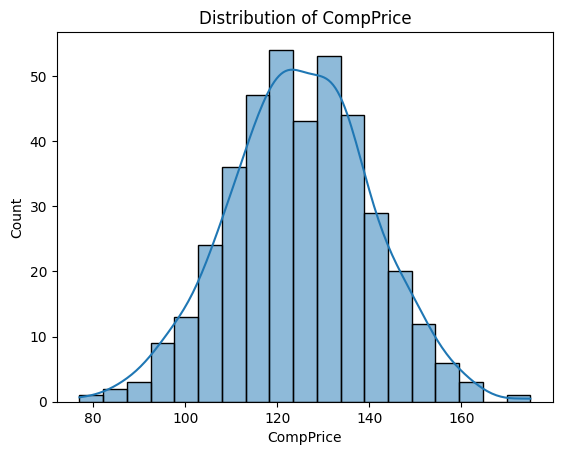

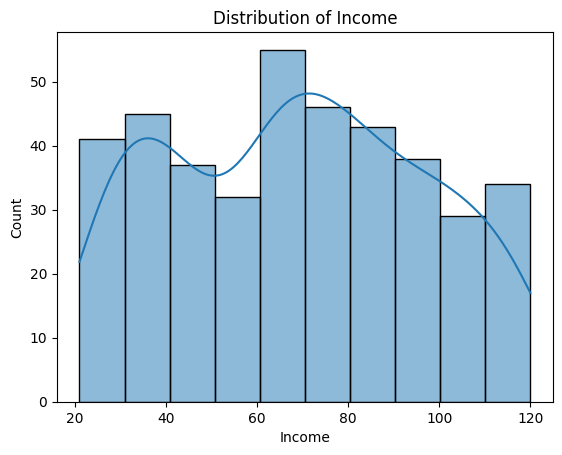

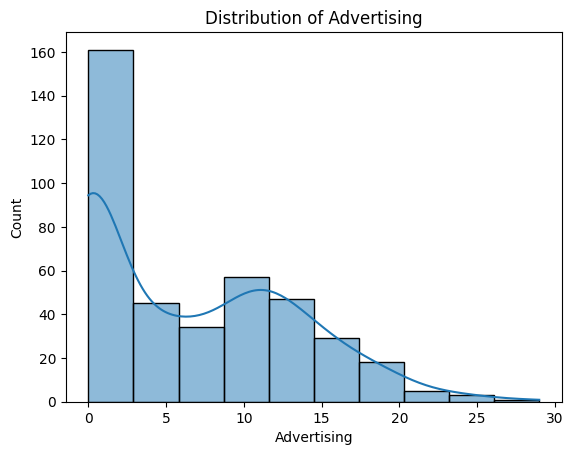

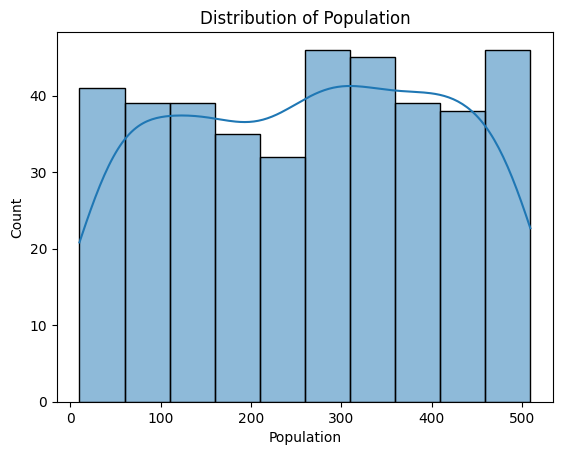

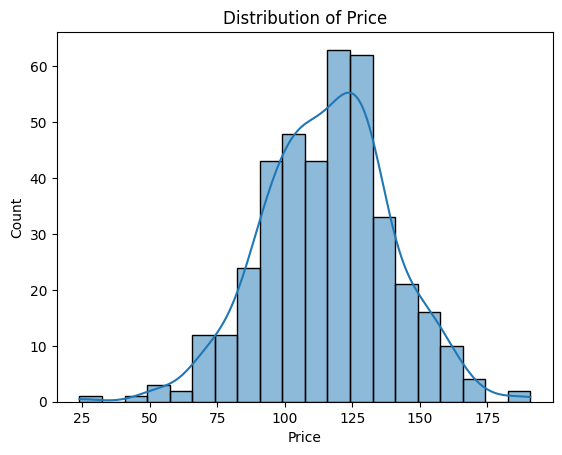

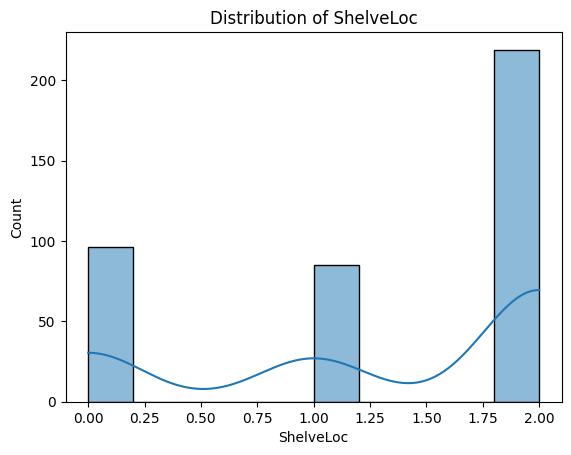

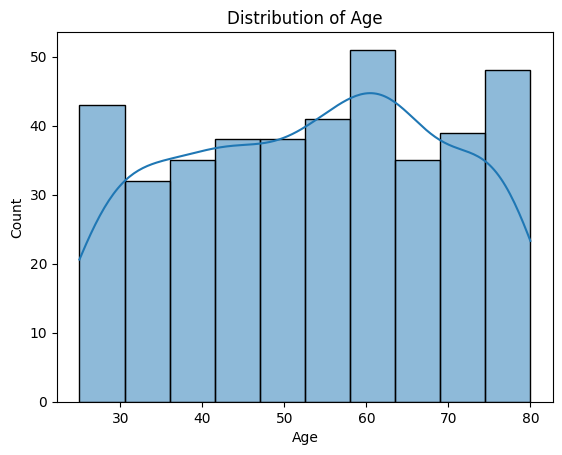

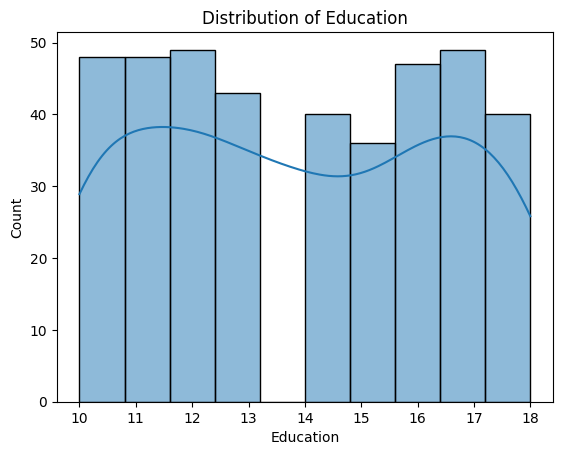

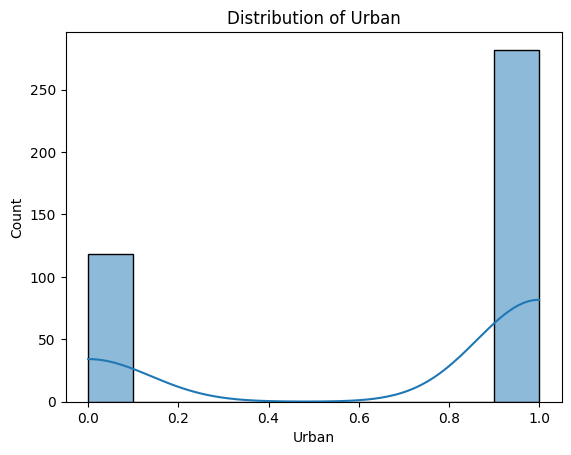

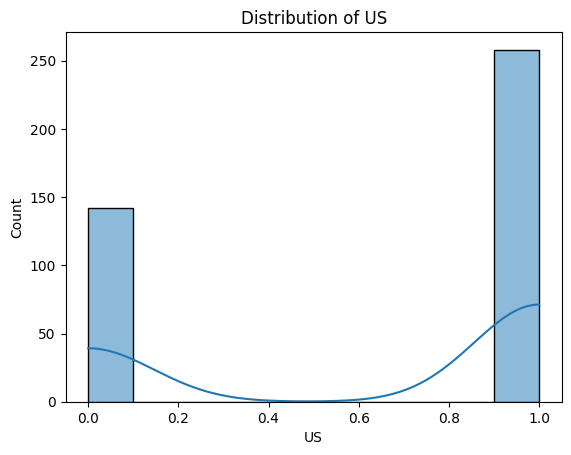

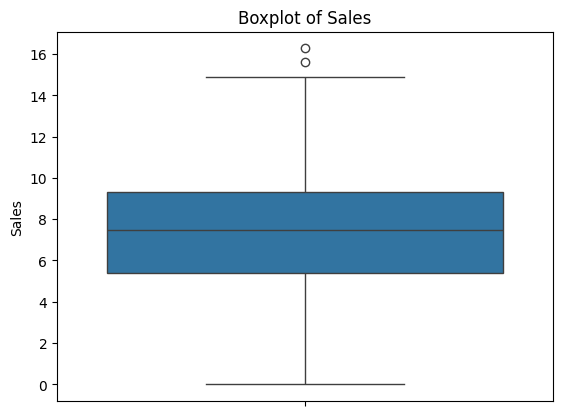

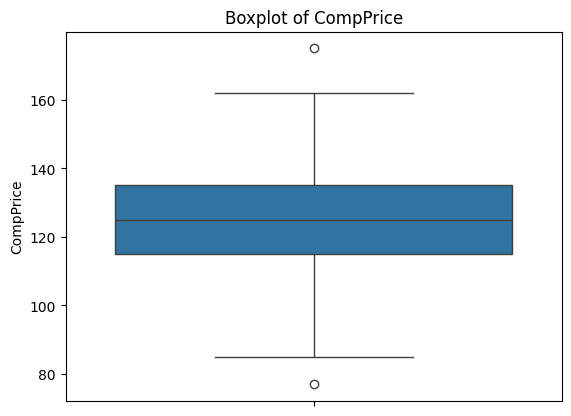

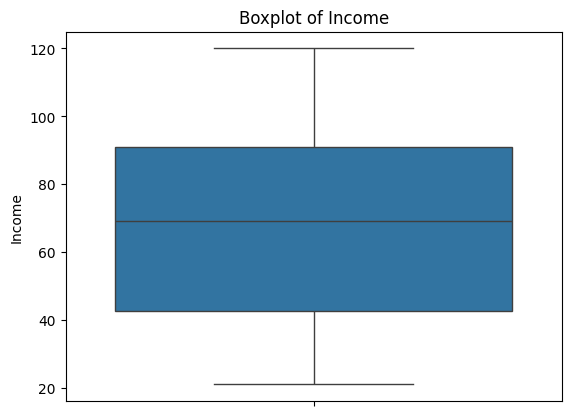

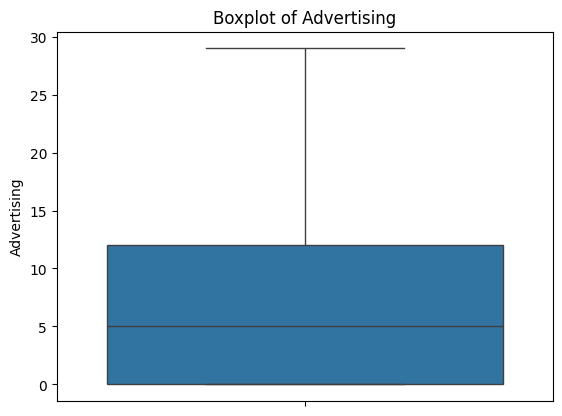

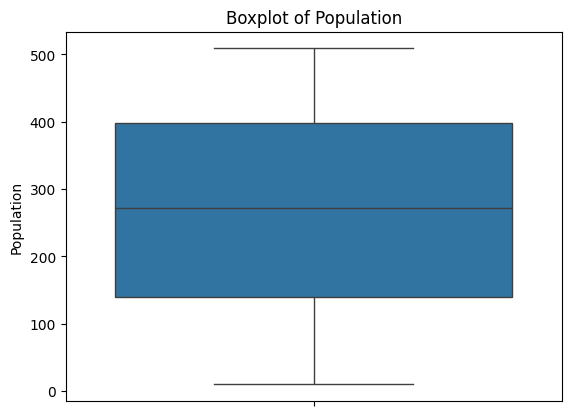

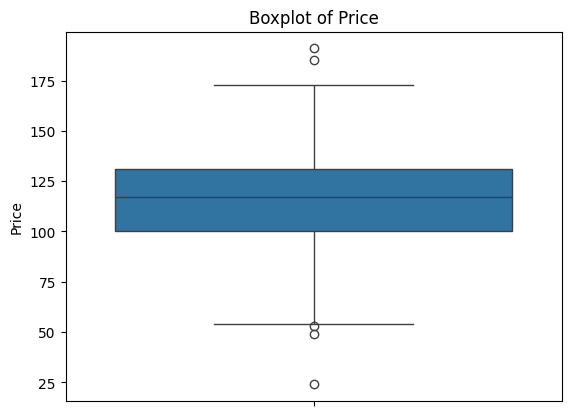

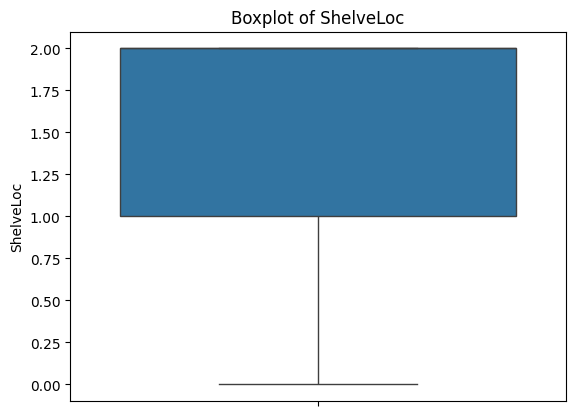

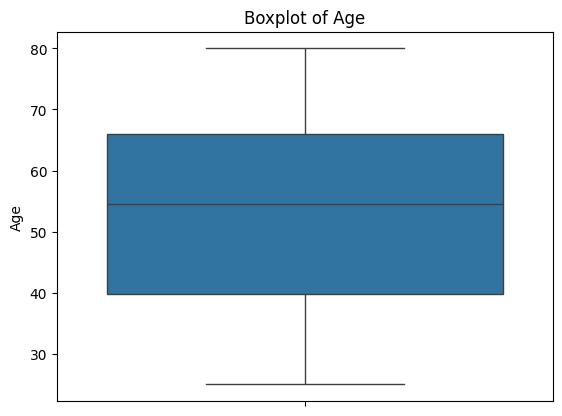

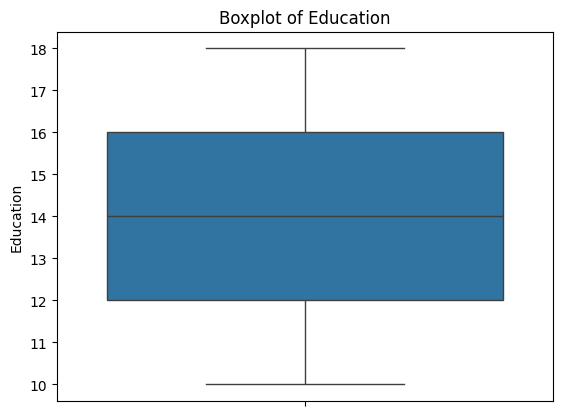

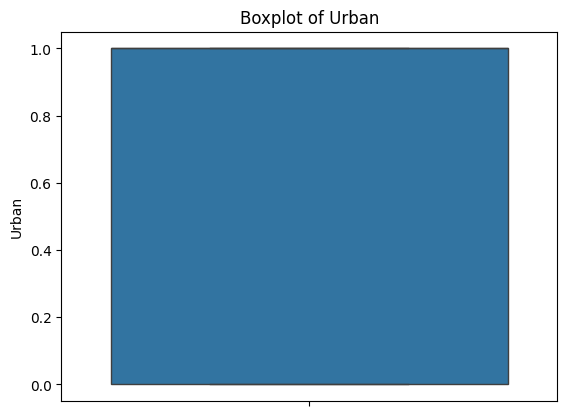

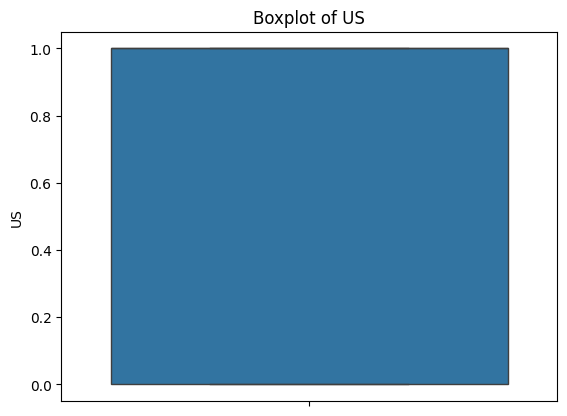

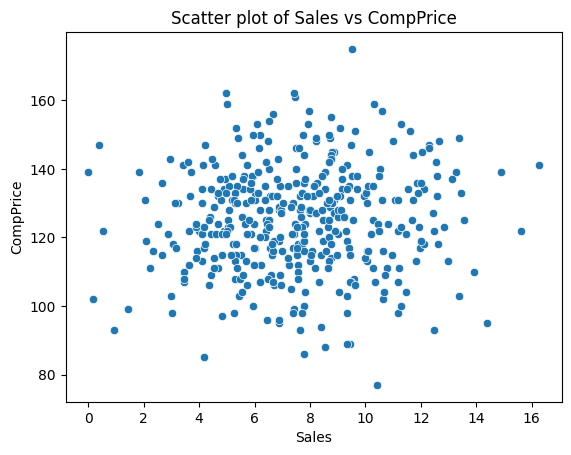

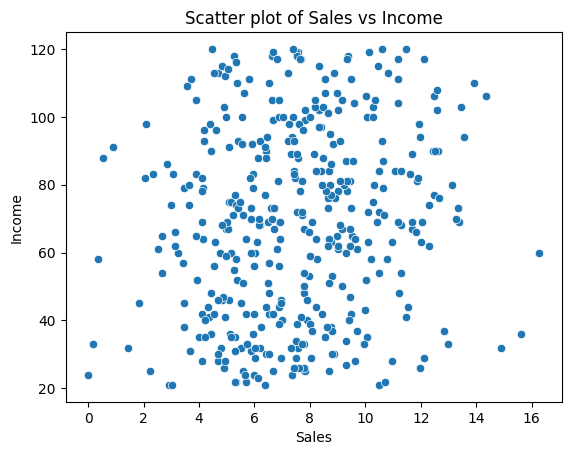

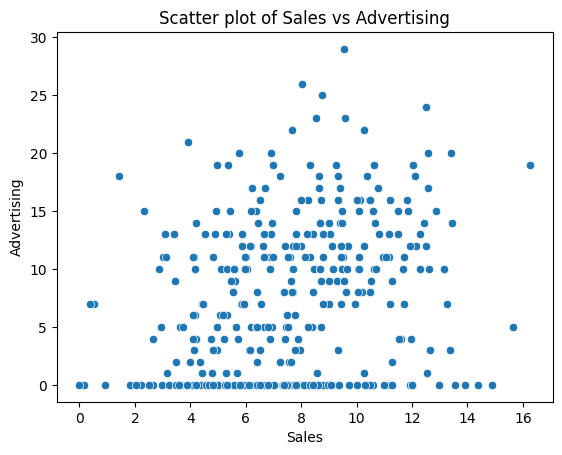

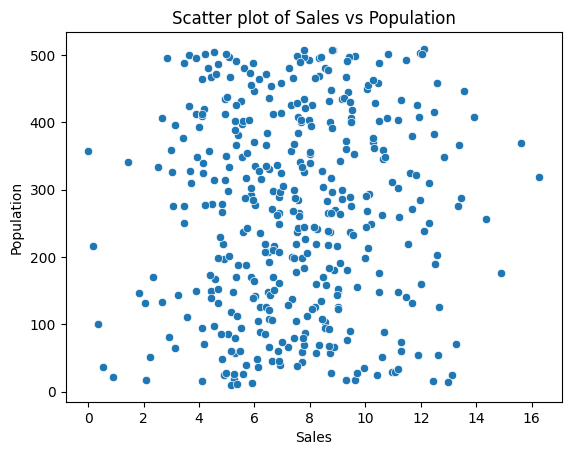

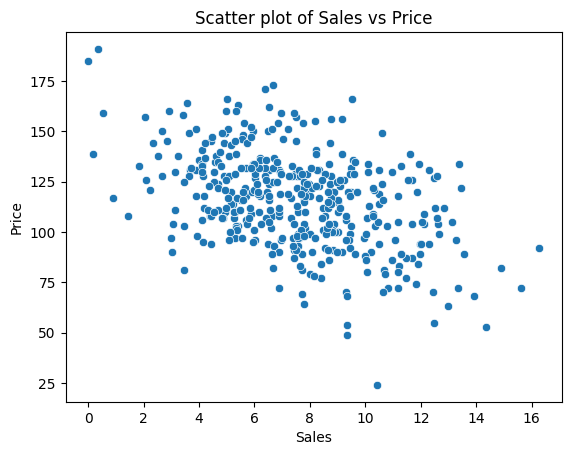

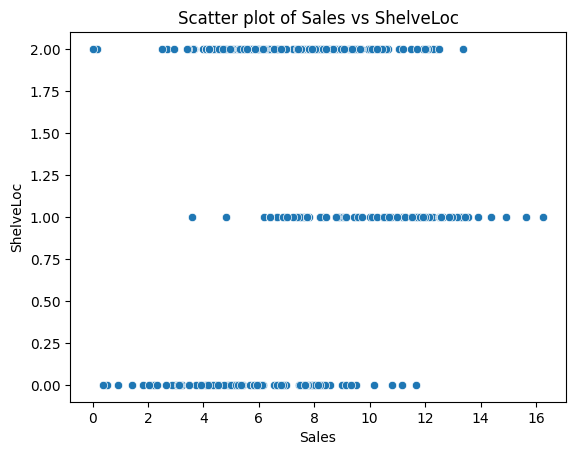

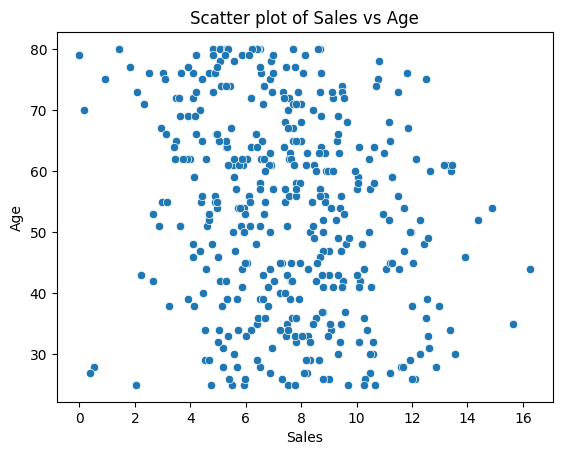

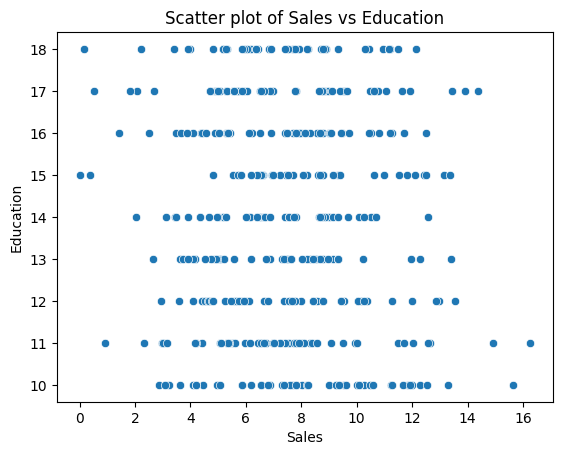

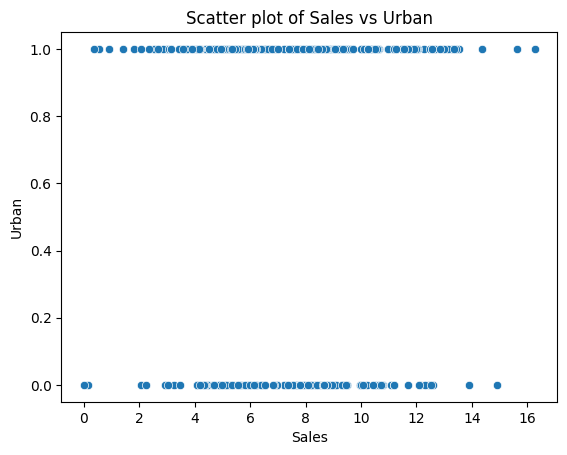

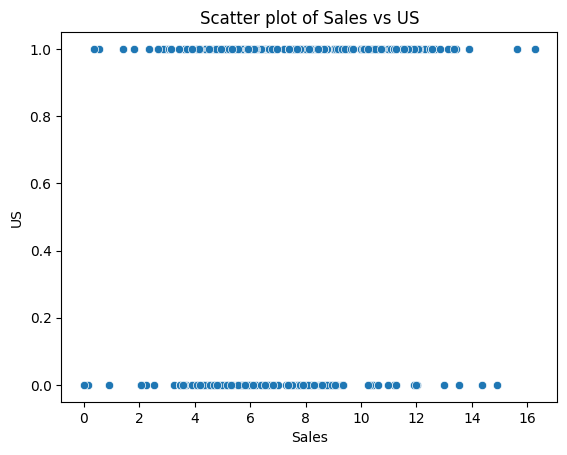

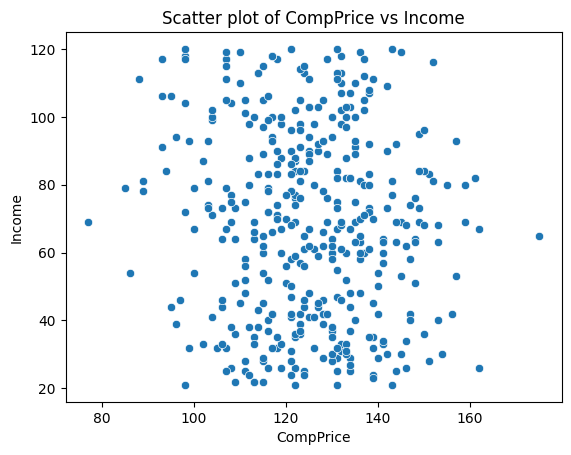

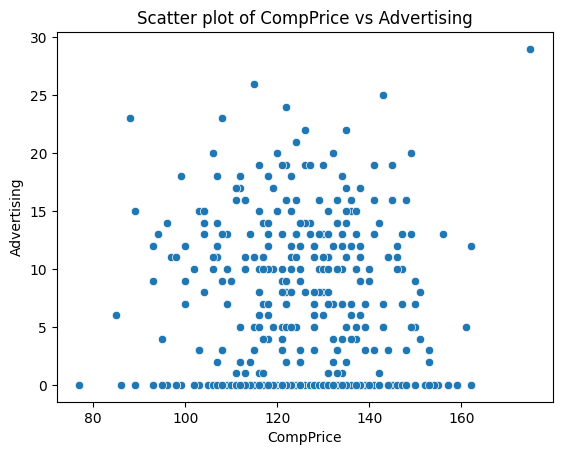

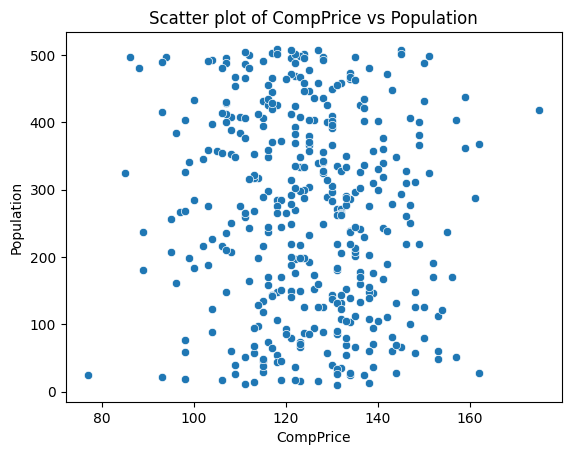

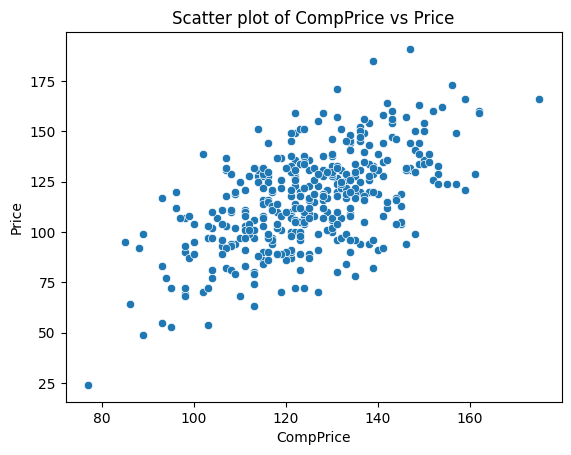

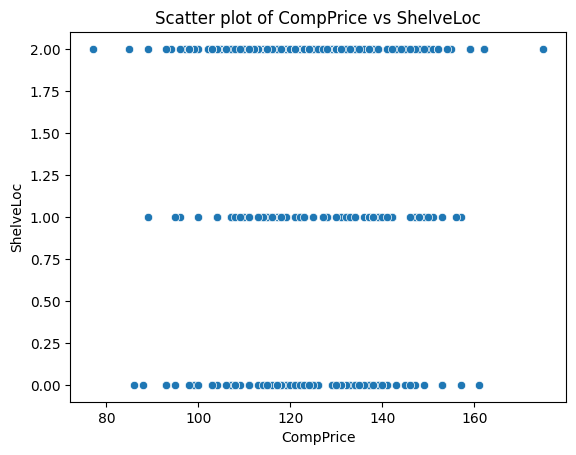

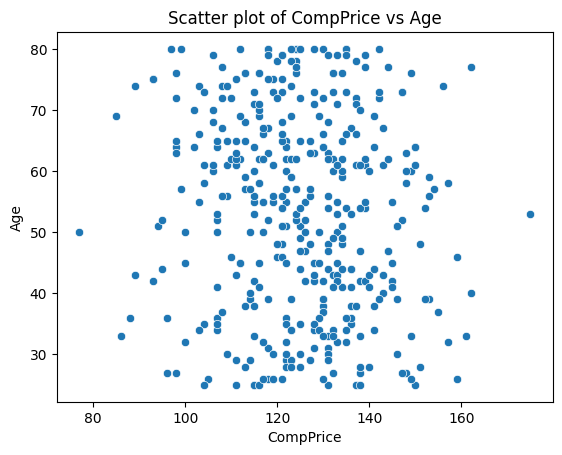

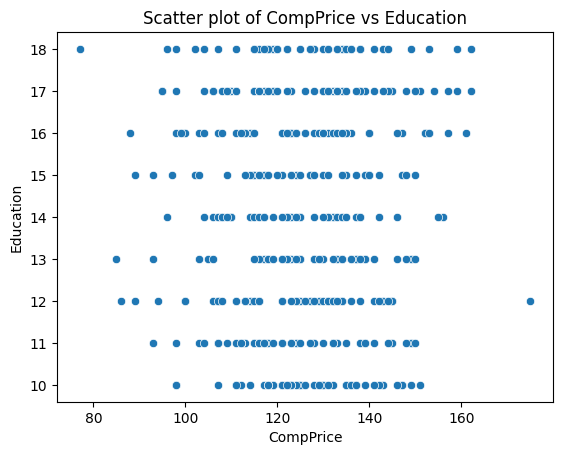

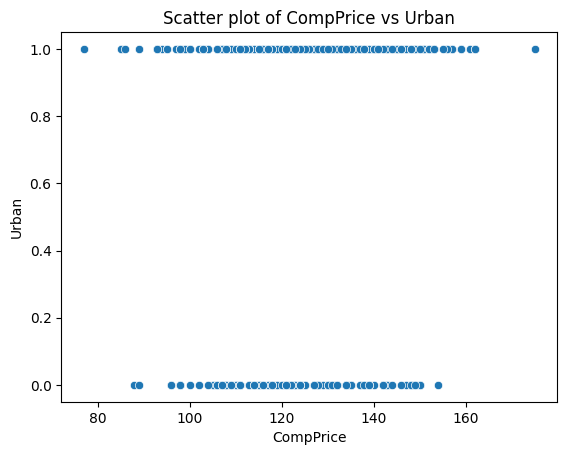

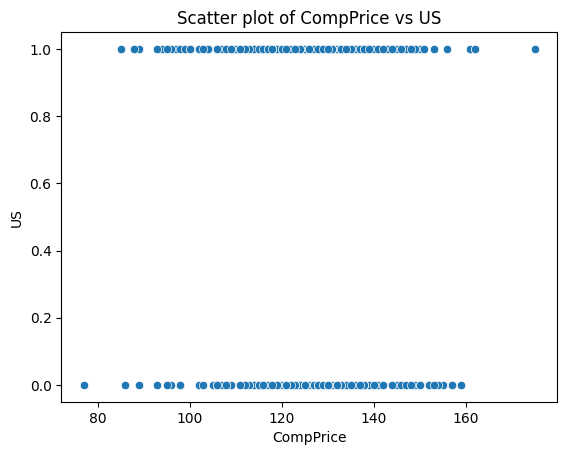

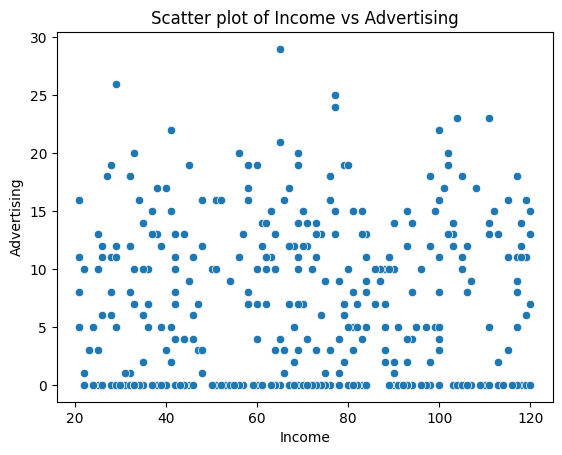

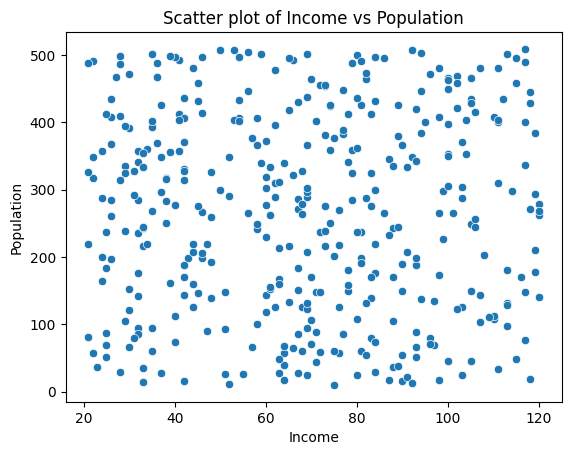

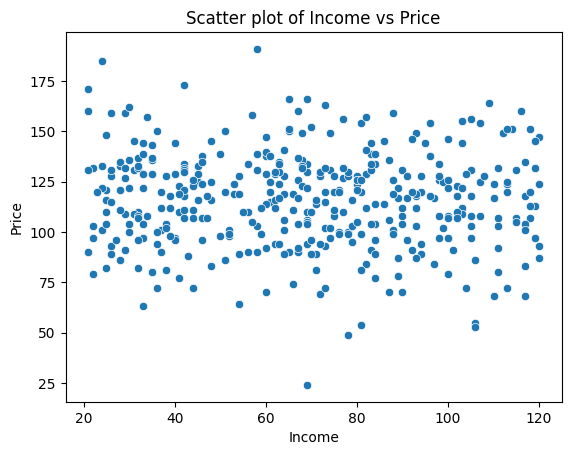

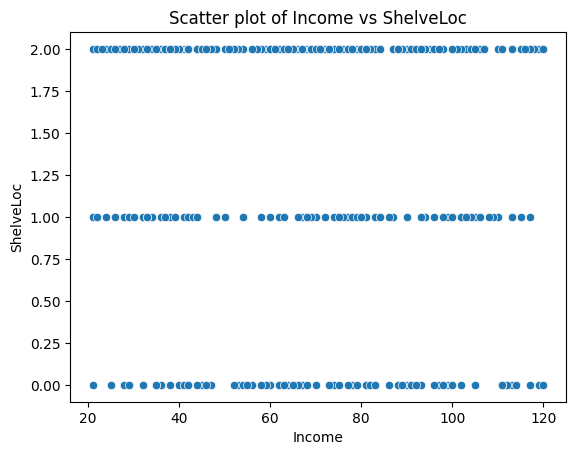

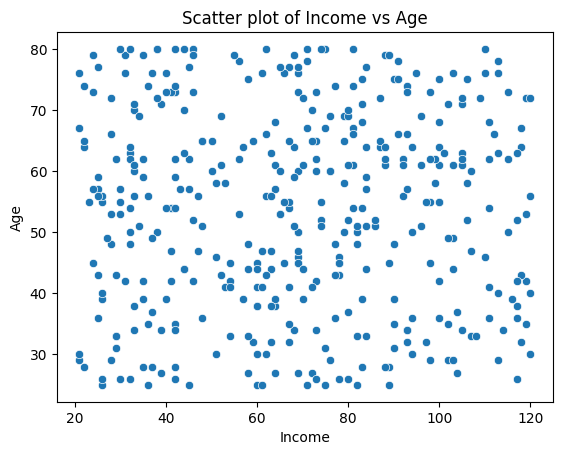

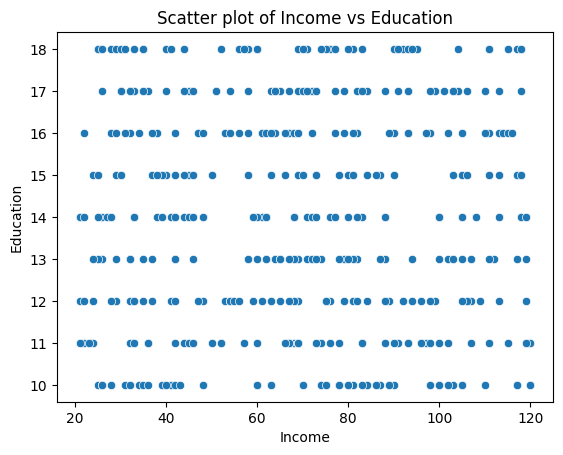

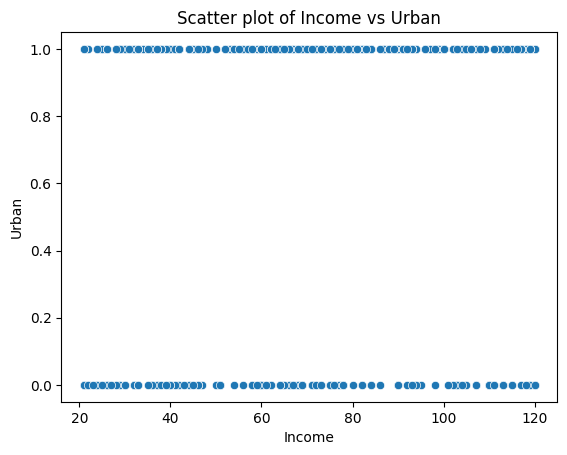

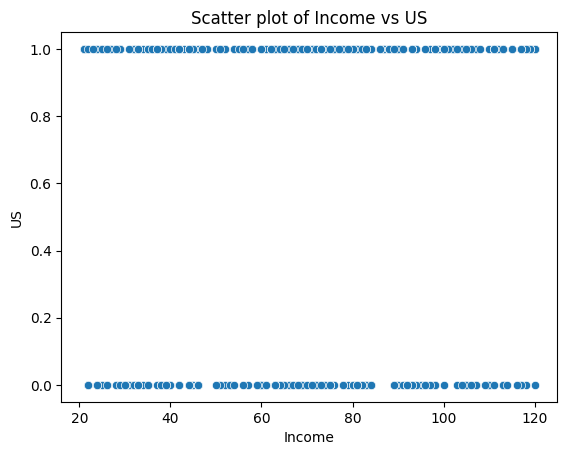

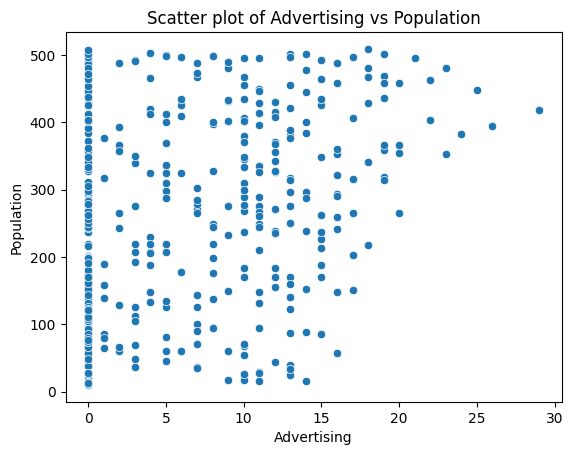

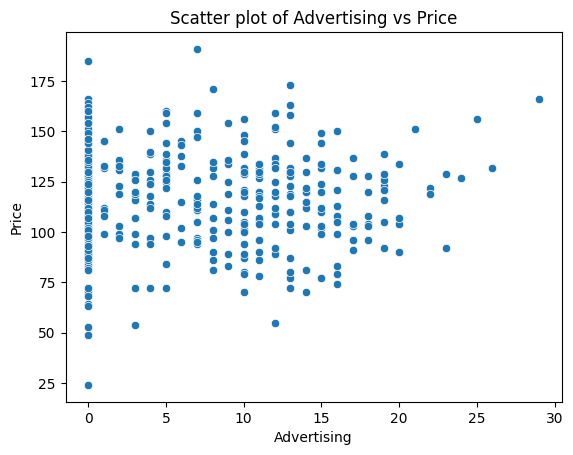

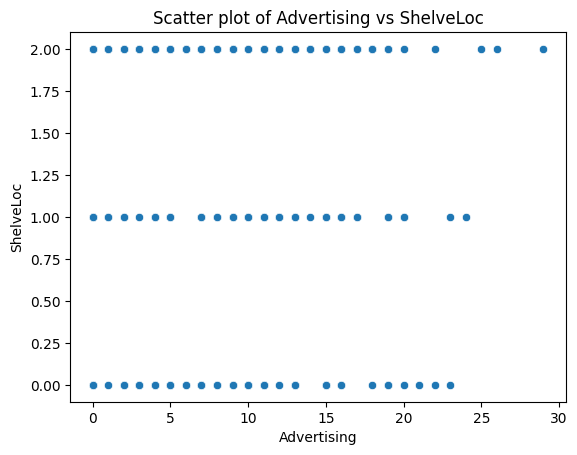

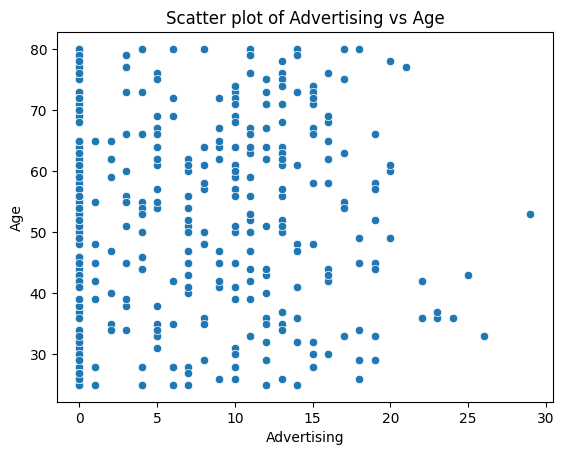

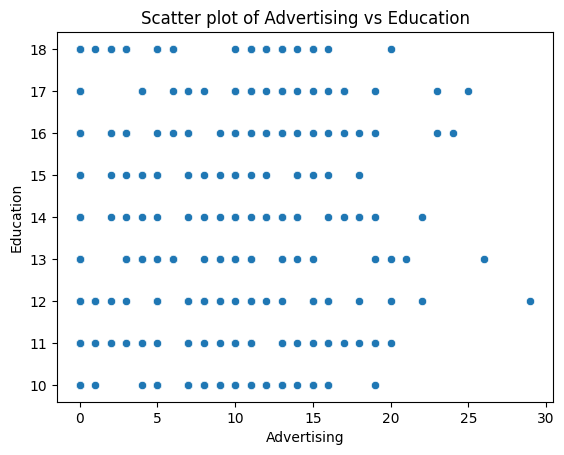

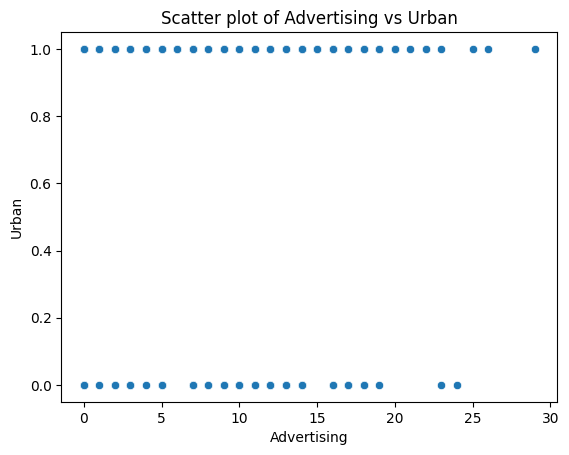

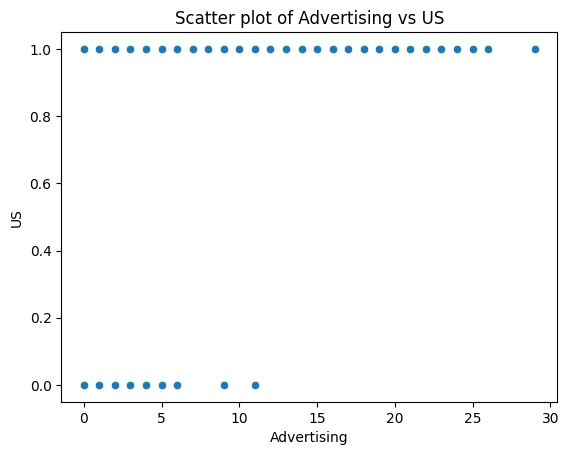

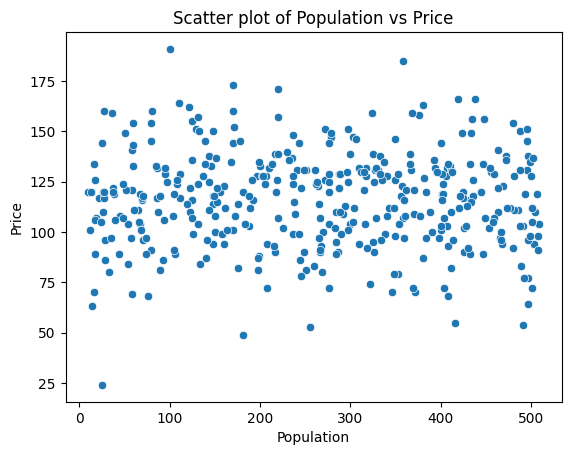

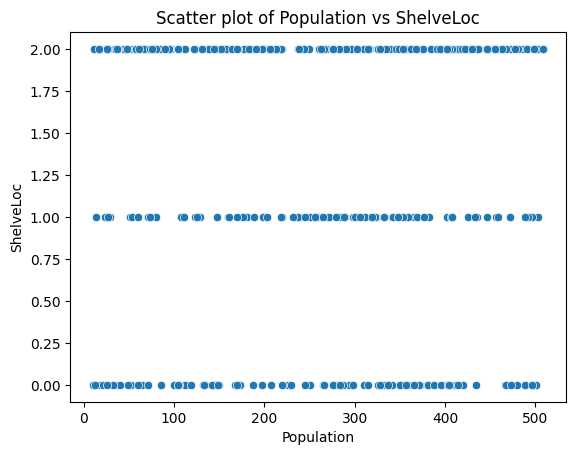

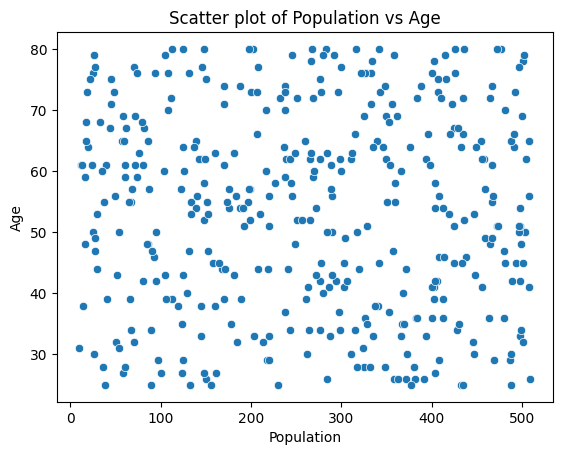

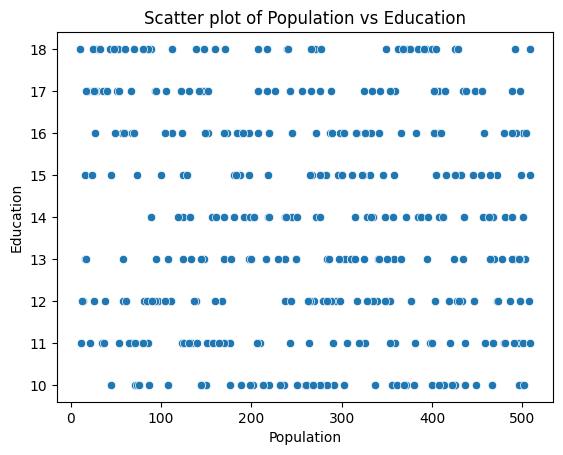

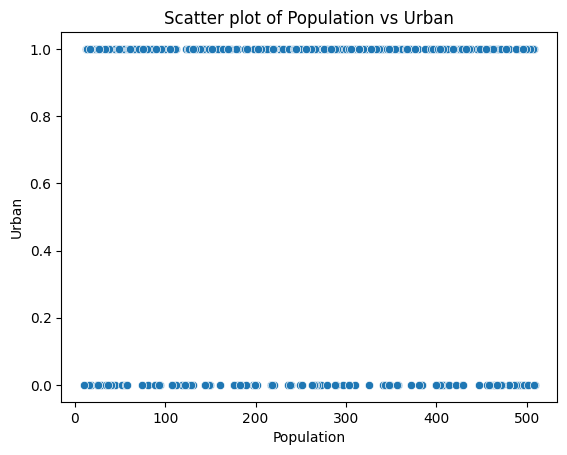

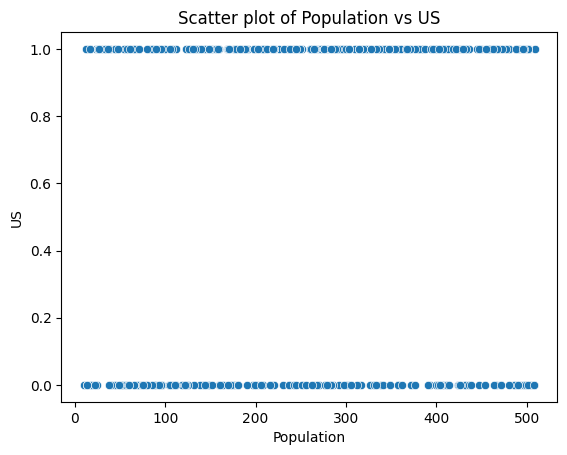

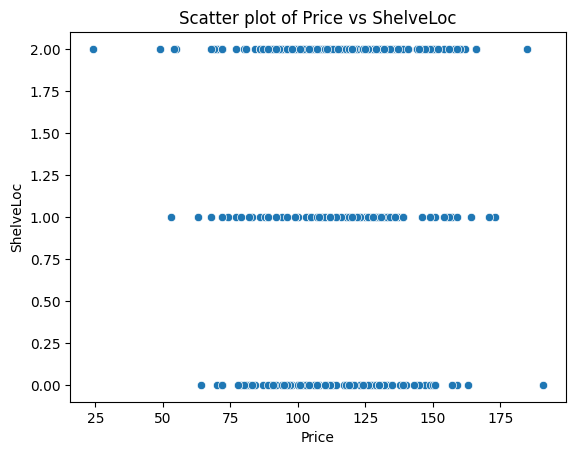

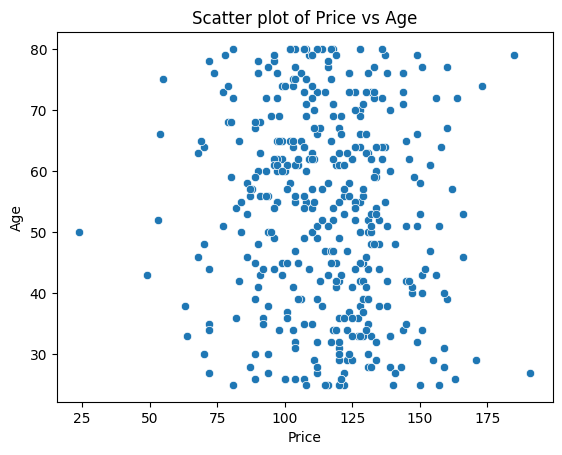

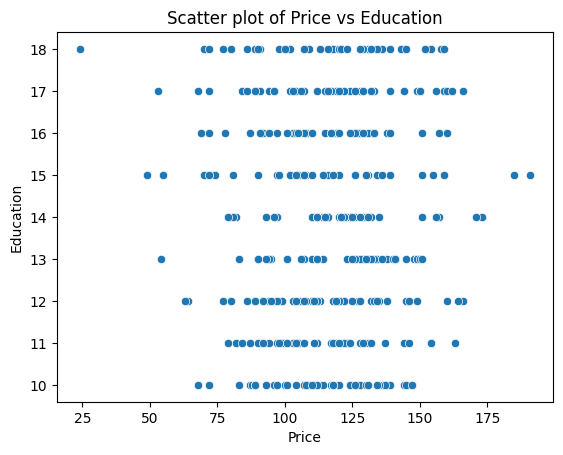

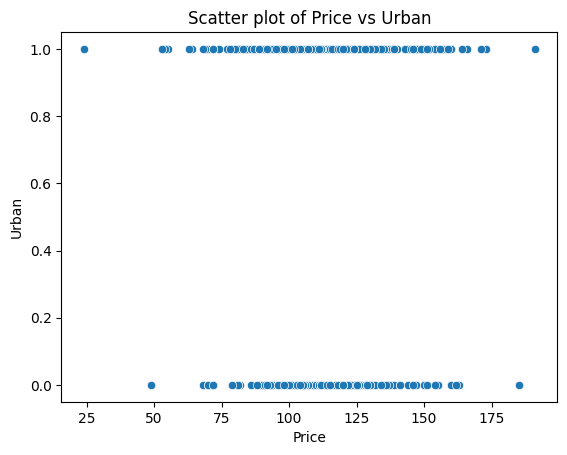

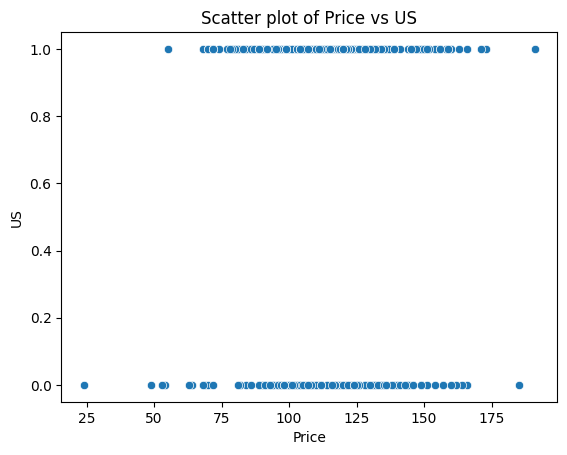

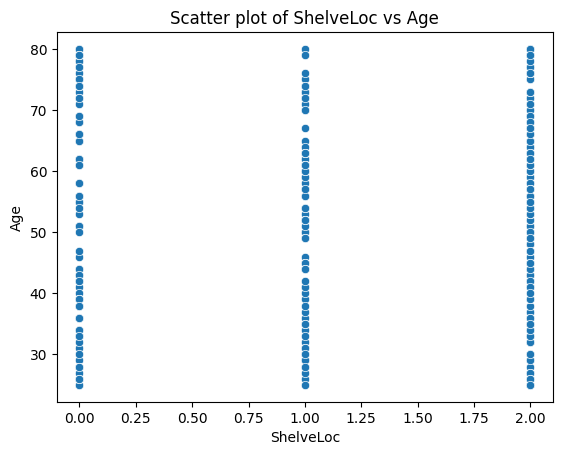

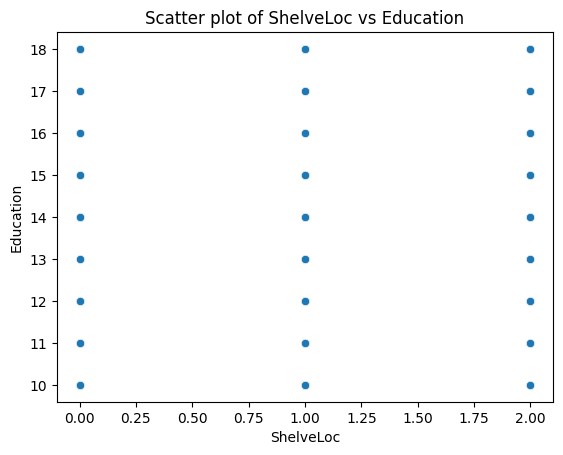

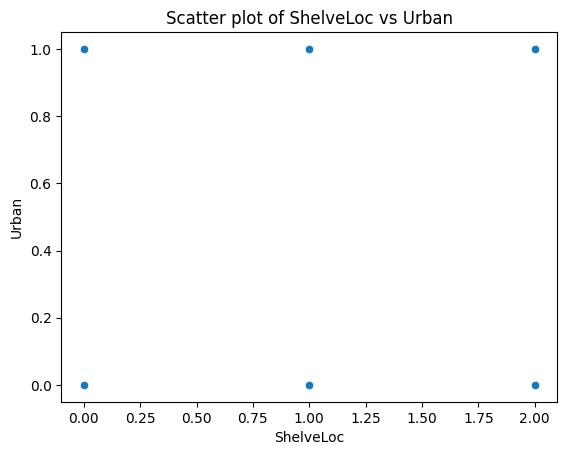

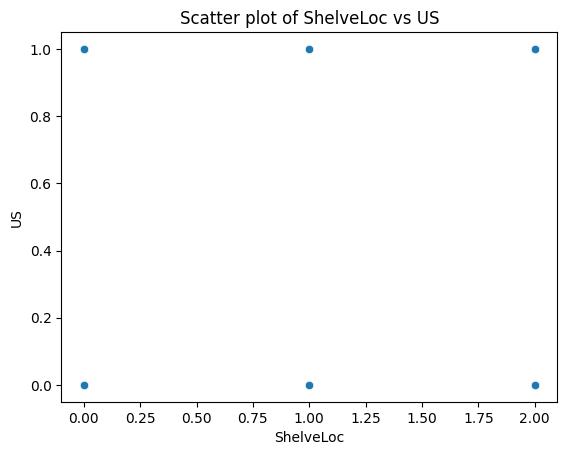

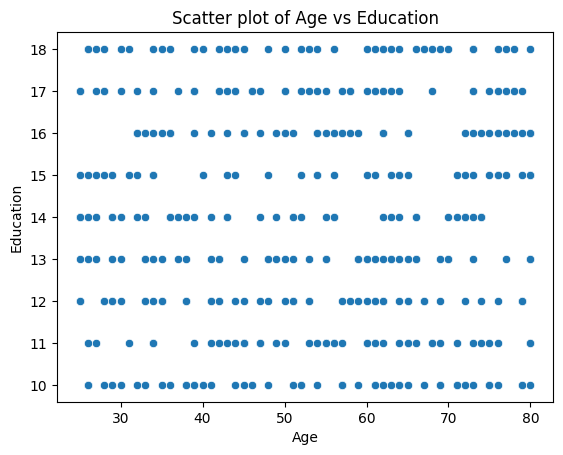

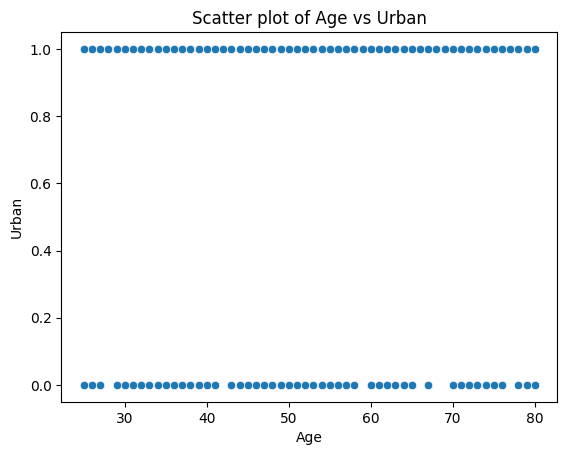

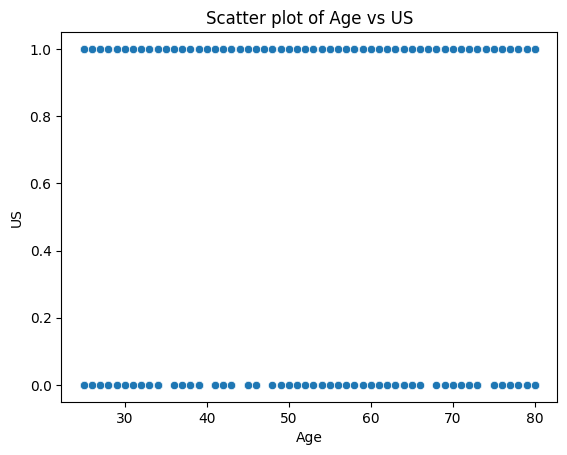

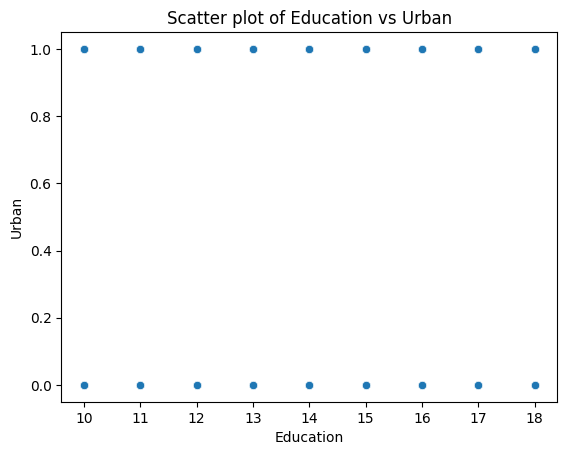

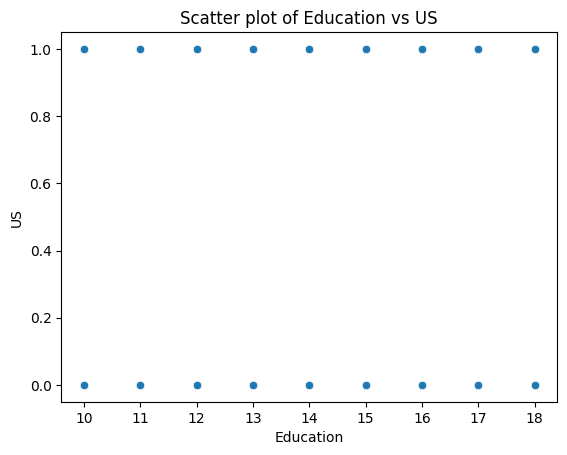

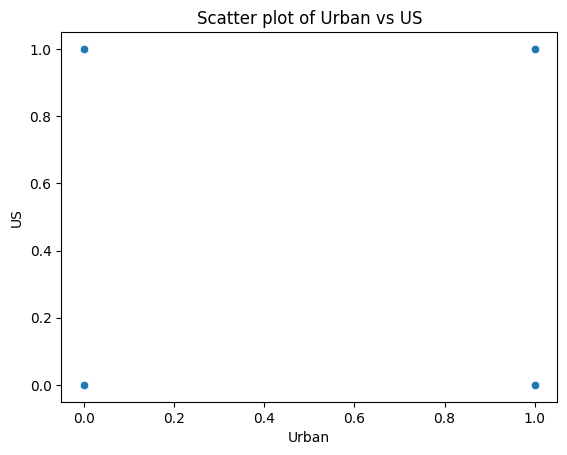

In [28]:
# prompt: all column wise give plots

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each column
for col in df.columns:
  plt.figure()
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

# Boxplot for each column
for col in df.columns:
  plt.figure()
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

# Scatter plot for each pair of columns
for i, col1 in enumerate(df.columns):
  for col2 in df.columns[i+1:]:
    plt.figure()
    sns.scatterplot(x=df[col1], y=df[col2])
    plt.title(f"Scatter plot of {col1} vs {col2}")
    plt.show()



In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.select_dtypes(include='object'):
  df[col] = le.fit_transform(df[col])

In [ ]:
X=df.drop(["City.Population"],axis=1)
Y=df["City.Population"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)


In [ ]:
# cross validation method
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()


training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Cross validation Training error: ", np.mean(training_error).round(2))
print("Cross validation Test error: ", np.mean(test_error).round(2))


Cross validation Training error:  0.0
Cross validation Test error:  72661.75


In [ ]:
# Bagging Regressor
from sklearn.ensemble import BaggingRegressor
dt_model = BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=100,max_features=0.7,max_samples=0.6)

training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Bagging-Cross validation Training error: ", np.mean(training_error).round(2))
print("Bagging-Cross validation Test error: ", np.mean(test_error).round(2))


Bagging-Cross validation Training error:  33404.71
Bagging-Cross validation Test error:  51627.69


In [ ]:
# RandomForests Regressor
from sklearn.ensemble import RandomForestRegressor
dt_model = RandomForestRegressor(n_estimators=100,max_features=0.7,max_samples=0.6)

training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("RandomForests-Cross validation Training error: ", np.mean(training_error).round(2))
print("RandomForests-Cross validation Test error: ", np.mean(test_error).round(2))



RandomForests-Cross validation Training error:  29258.29
RandomForests-Cross validation Test error:  52957.29


In [ ]:
# GradineBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
dt_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)

training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Gradient Boosting-Cross validation Training error: ", np.mean(training_error).round(2))
print("Gradient Boosting-Cross validation Test error: ", np.mean(test_error).round(2))


Gradient Boosting-Cross validation Training error:  37387.23
Gradient Boosting-Cross validation Test error:  53912.52


In [22]:
# prompt: import xg boost and fit the modlel evalute the croosavaladation\

import xgboost as xgb

dt_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)

training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("XGBoost-Cross validation Training error: ", np.mean(training_error).round(2))
print("XGBoost-Cross validation Test error: ", np.mean(test_error).round(2))


XGBoost-Cross validation Training error:  0.1
XGBoost-Cross validation Test error:  1.57


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
GB_reg = GradientBoostingRegressor()

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [0.7, 0.8, 0.9],
    'learning_rate': [0.01,0.1,0.5,1]}

# Create a GradientBoostingRegressor instance
GB_reg = GradientBoostingRegressor()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(GB_reg, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict the labels for the test data using the best model
Y_pred_train = best_model.predict(X_train)
Y_pred_test = best_model.predict(X_test)

# Calculate the accuracy of the best model
test_error = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
train_error = np.sqrt(mean_squared_error(Y_train, Y_pred_train))

# Print the accuracy of the

Best parameters: {'learning_rate': 0.1, 'max_features': 0.7, 'n_estimators': 100}


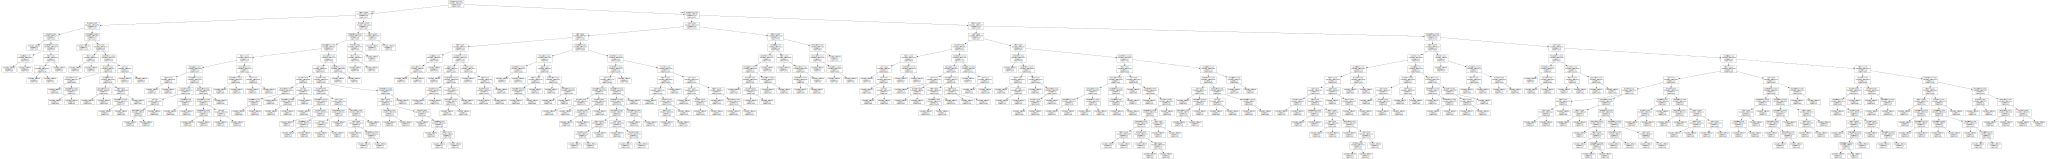

In [20]:
# Create a DecisionTreeRegressor object
dt_model_tree = DecisionTreeRegressor()

# Fit the DecisionTreeRegressor object to the training data
dt_model_tree.fit(X_train, Y_train)

# Export the decision tree graph
dot_data = export_graphviz(dt_model_tree, out_file=None, feature_names=X.columns)
graph = graphviz.Source(dot_data)
graph